# **Project Name**    - Bike Sharing Demand Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Vyankat B Hambarde (Individual)

# **Project Summary -**

Bike Seoul, a bike sharing service in Seoul, South Korea, plays a vital role in promoting sustainable transportation and easing traffic congestion. By enabling residents and visitors to rent bikes from diverse stations across the city and return them at any station, Bike Seoul offers a convenient and eco-friendly travel option. As demand for bike rentals in Seoul has risen in recent years, there is a growing need for more efficient bike sharing operations. Accurate prediction of bike demand becomes essential to optimize fleet management, ensure bike availability at high-demand spots, and minimize wastage and costs.

The central objective of this initiative involves the development of a proficient machine learning model that can precisely forecast bike rental demands in Seoul. This prediction relies on historical data and pertinent variables such as weather conditions, time of day, and public holidays. The project employed regression analysis techniques to model the historical bike demand information. This involved training the model on a comprehensive dataset encompassing past bike rental details, along with correlated weather and temporal information. Evaluation metrics like mean squared error and r-squared values were used to assess and test the model's performance. The primary aim was to achieve a minimum accuracy of 85% in bike demand predictions, thereby empowering the city's bike sharing providers to streamline fleet operations, promptly adapt to demand fluctuations, and enhance overall responsiveness. 

Various regression algorithms were explored, including linear regression, random forest, decision tree, gradient boosting, and Xtreme gradient boosting. Rigorous techniques like hyperparameter tuning and cross-validation were applied to enhance the model's precision. Ultimately, the Xtreme gradient boosting algorithm emerged as the chosen approach due to its impressive accuracy rates of approximately 93% and 90% on training and test data respectively.

This endeavor yielded not only invaluable insights into bike demand trends within Seoul but also showcased the pragmatic utility of machine learning in addressing real-world challenges. The implications of these findings could potentially extend to other cities with analogous bike sharing systems, thereby fostering enhanced services for bike users and more sustainable urban transportation systems.

# **GitHub Link -**

https://github.com/vyankath/Capstone_REG_BSD

# **Problem Statement**


Rental bicycles have been introduced in numerous urban centers to elevate the convenience of mobility. Ensuring the timely availability and accessibility of these rental bikes is pivotal in minimizing wait times. Consequently, establishing a consistent inventory of rental bikes within the city emerges as a significant focal point. The key challenge lies in forecasting the requisite bike quantities for each hour to maintain a steady provision of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import warnings
import warnings
warnings.filterwarnings('ignore')

# Import preporcessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import model selection libraries
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

# Import Outlier influence library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

### Dataset Loading

In [2]:
# Load Dataset

In [3]:
df = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')

In [4]:
# Load Dataset from github repository
"""url = 'https://raw.githubusercontent.com/yahya-ansariii/BikeSharingDemandRegression/master/SeoulBikeData.csv'
df = pd.read_csv(url, encoding='unicode_escape')"""

"url = 'https://raw.githubusercontent.com/yahya-ansariii/BikeSharingDemandRegression/master/SeoulBikeData.csv'\ndf = pd.read_csv(url, encoding='unicode_escape')"

### Dataset First View

In [5]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [6]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f"No of rows in dataset asre {df.shape[0]} and {df.shape[1]} are columns")

No of rows in dataset asre 8760 and 14 are columns


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
for col in df.columns:
    print(f"{col}:- {df[col].dtype}")                               # using for look checking thr data type of each column

Date:- object
Rented Bike Count:- int64
Hour:- int64
Temperature(°C):- float64
Humidity(%):- int64
Wind speed (m/s):- float64
Visibility (10m):- int64
Dew point temperature(°C):- float64
Solar Radiation (MJ/m2):- float64
Rainfall(mm):- float64
Snowfall (cm):- float64
Seasons:- object
Holiday:- object
Functioning Day:- object


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isna().mean()*100

Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64

<AxesSubplot:>

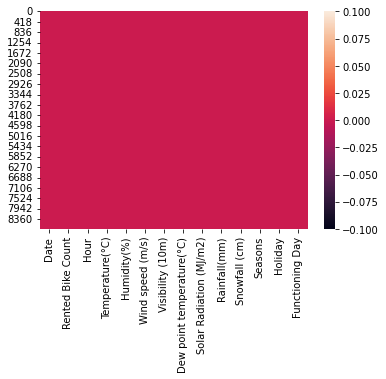

In [12]:
# Visualizing the missing values
sns.heatmap(df.isna())

### What did you know about your dataset?

- The dataset comprises 14 feature columns, with "Rented Bike Count" serving as the dependent variable column.
- The dataset encompasses a total of 8,760 observations (rows).
- Notably, there are no instances of duplicate rows present within the dataset.
- Moreover, the dataset is entirely devoid of any missing values or occurrences of Null values.
- There are 6 float64, 4 int64, and  4 object data type columns in the dataset.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe().round()                                               # gives the statstical info of dataset

Rented Bike Count    Hour  Temperature(°C)  Humidity(%)  \
count             8760.0  8760.0           8760.0       8760.0   
mean               705.0    12.0             13.0         58.0   
std                645.0     7.0             12.0         20.0   
min                  0.0     0.0            -18.0          0.0   
25%                191.0     6.0              4.0         42.0   
50%                504.0    12.0             14.0         57.0   
75%               1065.0    17.0             22.0         74.0   
max               3556.0    23.0             39.0         98.0   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count            8760.0            8760.0                     8760.0   
mean                2.0            1437.0                        4.0   
std                 1.0             608.0                       13.0   
min                 0.0              27.0                      -31.0   
25%                 1.0             940.0                       -5.0   
50%                 2.0            1698.0                        5.0   
75%                 2.0            2000.0                       15.0   
max                 7.0            2000.0                       27.0   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count                   8760.0        8760.0         8760.0  
mean                       1.0           0.0            0.0  
std                        1.0           1.0            0.0  
min                        0.0           0.0            0.0  
25%                        0.0           0.0            0.0  
50%                        0.0           0.0            0.0  
75%                        1.0           0.0            0.0  
max                        4.0          35.0            9.0

### Variables Description 

**The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.**

**Attribute Information:**

- Date :- The date of the day, formating in DD/MM/YYYY
- Rented Bike Count :- Number of rented bikes per hour which our dependent variable and we need to predict that.
- Hour :- The hour of the day, starting from 0-23 it's in a digital time format.
- Temperature(°C) :- Temperature in Celsius.
- Humidity(%) :- Humidity in the air in %.
- Wind speed (m/s) :- Speed of the wind in m/s.
- Visibility (10m) :- Visibility in m.
- Dew point temperature(°C) :- Temperature at the beggining of the day.
- Solar Radiation (MJ/m2) :- Sun contribution.
- Rainfall(mm) :- Amount of raining in mm.
- Snowfall (cm) :- Amount of snowing in cm.
- Seasons :- Season of the year.
- Holiday :- If the day is holiday period or not.
- Functioning Day :- If the day is a Functioning Day or not.

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for col in df.columns:
  print(f"Unique values in a {col} are {df[col].nunique()}")        # using for loop and nunique method cheking unique values in each col

Unique values in a Date are 365
Unique values in a Rented Bike Count are 2166
Unique values in a Hour are 24
Unique values in a Temperature(°C) are 546
Unique values in a Humidity(%) are 90
Unique values in a Wind speed (m/s) are 65
Unique values in a Visibility (10m) are 1789
Unique values in a Dew point temperature(°C) are 556
Unique values in a Solar Radiation (MJ/m2) are 345
Unique values in a Rainfall(mm) are 61
Unique values in a Snowfall (cm) are 51
Unique values in a Seasons are 4
Unique values in a Holiday are 2
Unique values in a Functioning Day are 2


## 3. ***Data Wrangling***

Some names of the variables are not relevant and not easy to understand. Some data may have data entry errors, and some variables may need data type conversion and we need to fix this issue in the data and this is reffered as the "Data Wrangling" process.

This need to be done before EDA as it will help to perform EDA effectively.

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
df_copy = df.copy()                                                 # Before doing any data wrangling lets create copy of the dataset

In [17]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [18]:
df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour','Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility','Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall','Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},inplace=True)
                                                                    # renaming the columns in to lower case some are with units so removing that too.

In [19]:
# Dealing with date column as in dataset it has object dtype so converting it into numerical.

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')   # Converting the 'Date' column to datetime and in this format '%d/%m/%Y' to extract d/m/y

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year                                     # Extract day, month, and year into separate columns

df['weekday'] = df['date'].dt.weekday                               # getting the weekday from date column
df['day_type'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)  # Maping the day of the week to weekend = 1 or  Weekday =0

df.drop(columns=['date'], inplace=True)
df

rented_bike_count  hour  temperature  humidity  wind_speed  visibility  \
0                   254     0         -5.2        37         2.2        2000   
1                   204     1         -5.5        38         0.8        2000   
2                   173     2         -6.0        39         1.0        2000   
3                   107     3         -6.2        40         0.9        2000   
4                    78     4         -6.0        36         2.3        2000   
...                 ...   ...          ...       ...         ...         ...   
8755               1003    19          4.2        34         2.6        1894   
8756                764    20          3.4        37         2.3        2000   
8757                694    21          2.6        39         0.3        1968   
8758                712    22          2.1        41         1.0        1859   
8759                584    23          1.9        43         1.3        1909   

      dew_point_temp  solar_radiation  rainfall  snowfall seasons     holiday  \
0              -17.6              0.0       0.0       0.0  Winter  No Holiday   
1              -17.6              0.0       0.0       0.0  Winter  No Holiday   
2              -17.7              0.0       0.0       0.0  Winter  No Holiday   
3              -17.6              0.0       0.0       0.0  Winter  No Holiday   
4              -18.6              0.0       0.0       0.0  Winter  No Holiday   
...              ...              ...       ...       ...     ...         ...   
8755           -10.3              0.0       0.0       0.0  Autumn  No Holiday   
8756            -9.9              0.0       0.0       0.0  Autumn  No Holiday   
8757            -9.9              0.0       0.0       0.0  Autumn  No Holiday   
8758            -9.8              0.0       0.0       0.0  Autumn  No Holiday   
8759            -9.3              0.0       0.0       0.0  Autumn  No Holiday   

     func_day  day  month  year  weekday  day_type  
0         Yes    1     12  2017        4         0  
1         Yes    1     12  2017        4         0  
2         Yes    1     12  2017        4         0  
3         Yes    1     12  2017        4         0  
4         Yes    1     12  2017        4         0  
...       ...  ...    ...   ...      ...       ...  
8755      Yes   30     11  2018        4         0  
8756      Yes   30     11  2018        4         0  
8757      Yes   30     11  2018        4         0  
8758      Yes   30     11  2018        4         0  
8759      Yes   30     11  2018        4         0  

[8760 rows x 18 columns]

In [20]:
for col in df.columns:
  print(f"Unique values in a {col} are {df[col].nunique()}")        # using for loop and nunique method checking the unique values of each col

Unique values in a rented_bike_count are 2166
Unique values in a hour are 24
Unique values in a temperature are 546
Unique values in a humidity are 90
Unique values in a wind_speed are 65
Unique values in a visibility are 1789
Unique values in a dew_point_temp are 556
Unique values in a solar_radiation are 345
Unique values in a rainfall are 61
Unique values in a snowfall are 51
Unique values in a seasons are 4
Unique values in a holiday are 2
Unique values in a func_day are 2
Unique values in a day are 31
Unique values in a month are 12
Unique values in a year are 2
Unique values in a weekday are 7
Unique values in a day_type are 2


In [22]:
cat_col = [i for i in df.columns if df[i].nunique()<=5]             # separating continiouse and categorical col on the basis of unique values
print(f"Categorical columns are :- {cat_col}")                      # taking as 5 unique value threshold
cont_col = [i for i in df.columns if i not in cat_col]
print(f"Continious columns are :- {cont_col}")

Categorical columns are :- ['seasons', 'holiday', 'func_day', 'year', 'day_type']
Continious columns are :- ['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall', 'day', 'month', 'weekday']


In [23]:
weather_col = []                                                    # creating weather col list on the basis of weather condition
weather_col.extend(cont_col[2:10])
weather_col

['temperature',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall']

In [24]:
df.drop(columns=['year','day','weekday'],inplace=True)              # dropping the unneccesary cols

In [25]:
cont_col.remove('day')
cont_col.remove('weekday')
cat_col.remove('year')                                              # removing from list the unneccesary cols    

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rented_bike_count  8760 non-null   int64  
 1   hour               8760 non-null   int64  
 2   temperature        8760 non-null   float64
 3   humidity           8760 non-null   int64  
 4   wind_speed         8760 non-null   float64
 5   visibility         8760 non-null   int64  
 6   dew_point_temp     8760 non-null   float64
 7   solar_radiation    8760 non-null   float64
 8   rainfall           8760 non-null   float64
 9   snowfall           8760 non-null   float64
 10  seasons            8760 non-null   object 
 11  holiday            8760 non-null   object 
 12  func_day           8760 non-null   object 
 13  month              8760 non-null   int64  
 14  day_type           8760 non-null   int64  
dtypes: float64(6), int64(6), object(3)
memory usage: 1.0+ MB


In [28]:
encoding_col = []                                                   # separating the colm which are needs to be encoded
for col in df.columns:
    if df[col].dtype == "object":
        encoding_col.append(col)
encoding_col

['seasons', 'holiday', 'func_day']

In [29]:
df['seasons'].value_counts().to_dict()

{'Spring': 2208, 'Summer': 2208, 'Autumn': 2184, 'Winter': 2160}

In [30]:
df['seasons'].replace({'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4},inplace=True) # 'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4

In [31]:
df['holiday'].value_counts().to_dict()

{'No Holiday': 8328, 'Holiday': 432}

In [32]:
df['holiday'].replace({'No Holiday': 0, 'Holiday': 1},inplace=True) # {'No Holiday': 0, 'Holiday': 1} replacing the ordinal values

In [33]:
df['func_day'].value_counts().to_dict()

{'Yes': 8465, 'No': 295}

In [34]:
df['func_day'].replace({'Yes': 1, 'No': 0},inplace=True) # {'Yes': 1, 'No': 0} replacing the ordinal values

### What all manipulations have you done and insights you found?

- Renamed the columns in to lower case, some columns were with units attached so removed that.

**This is about Date Column Transformation**

- The "date" column is transformed into three distinct columns: "year," "month," and "day."
- The "year" column within our dataset holds two unique values, encompassing data from December 2017 to November 2018, since we treat this interval as a single year, the "year" column is superfluous and can be eliminated.
- As for the "day" column, it provides data about each day of the month. However, for our specific analysis, the focus shifts to categorizing days as weekdays or weekends, alongside we created weekday to map the weekend and weekdy so weekday and day  column unnecessary and thus it can be dropped.

- Separated columns into continiouse and categorical on the basis of valuecounts taking threshold as 5.

- Created another list which contain weather related features named as weather_col.

- Converted all columns into float and int

- 'seasons', 'holiday', 'func_day' these columns are with ordinal value so replaced with numbers. 'Spring'as 1, 'Summer'as 2, 'Autumn'as 3, 'Winter'as 4 in season column, 'No Holiday'as 0, 'Holiday'as 1 in Holiday column and 'Yes'as 1, 'No' as 0 in functional day.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Exploratory Data Analysis** (EDA) involves the initial investigation of data through summary statistics and visuals to uncover patterns, anomalies, test hypotheses, and validate assumptions. It's essential for understanding data before deeper analysis.

**Univariate Analysis:** Inspecting each variable individually to understand its distribution and potential outliers. This will provide insights into the characteristics of each variable and help identify any extreme values or anomalies.

#### Chart - 1 rented_bike_count (Dependent Variable)

Statastical information of dependent variable:-
count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: rented_bike_count, dtype: float64


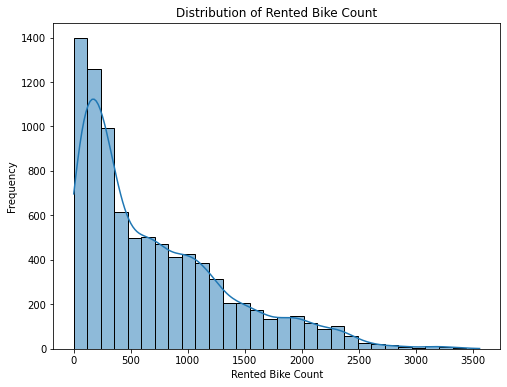

In [35]:
# Chart - 1 visualization code

rented_bike_stats = df['rented_bike_count'].describe()              # Summary statistics of the "rented_bike_count" column
print(f"Statastical information of dependent variable:-\n{rented_bike_stats}")

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='rented_bike_count', bins=30, kde=True)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()                                                          # Visualization - Histogram of "rented_bike_count"

##### 1. Why did you pick the specific chart?

The histogram plot is chosen because it effectively visualizes the distribution of a continuous variable like "rented_bike_count." It provides insights into the concentration of values within specific ranges and highlights any peaks or patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

The distribution of rented bike counts is right-skewed, indicating that most of the time, the rental count is on the lower side, with fewer instances of very high rental counts.

From the stats info we found some info like,

- The mean (704.6) and median (504.5) indicate that the distribution of rented bike counts is positively skewed, with a tail towards higher counts. This suggests that there are relatively few instances of very high rental counts, but some instances do exhibit significant demand.

- The relatively high standard deviation (645) suggests a wide variability in rental counts. This could indicate varying demand patterns based on factors like time of day, day of the week, weather conditions, etc.

- The fact that the 25th percentile is at 191 and the 75th percentile is at 1065.25 indicates that a significant proportion of instances fall within the lower to mid-range of rental counts, while some instances experience notably higher demand.

- The presence of the minimum at 0 and the skewness of the distribution suggest that there are periods when no bikes are rented. This could be due to off-peak hours or other factors affecting demand.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Peaks at 0-500 suggest high demand during certain times (commuting, good weather).
- Skewed distribution indicates potential for tailored pricing and off-peak incentives.

- Over-reliance on high rentals may overlook lower demand.
- Balancing strategy needed to avoid missed revenue.

#### Chart - 2 Univariate Analysis of independent columns

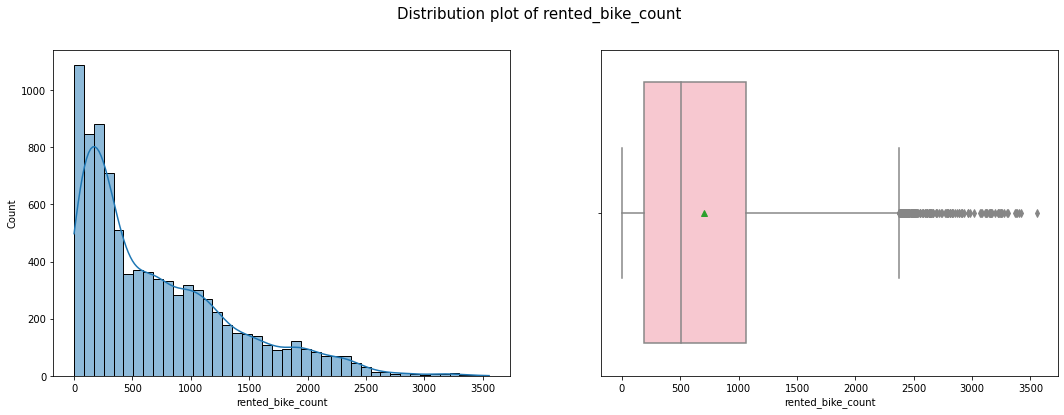

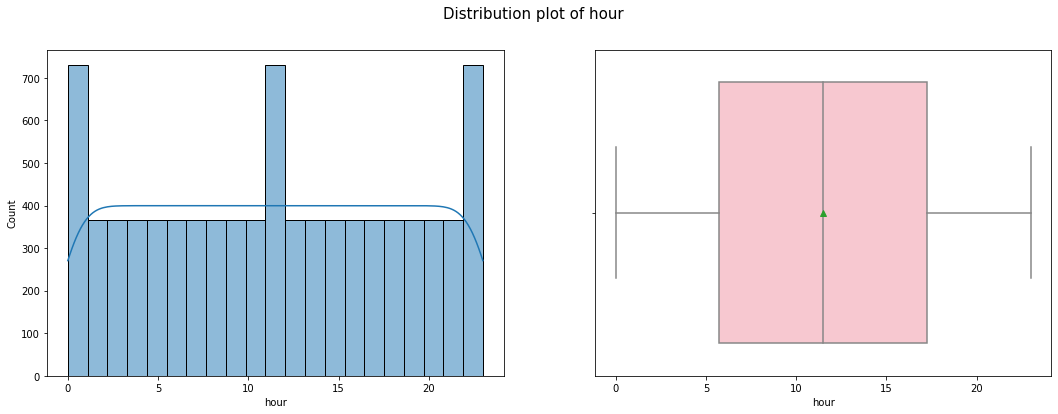

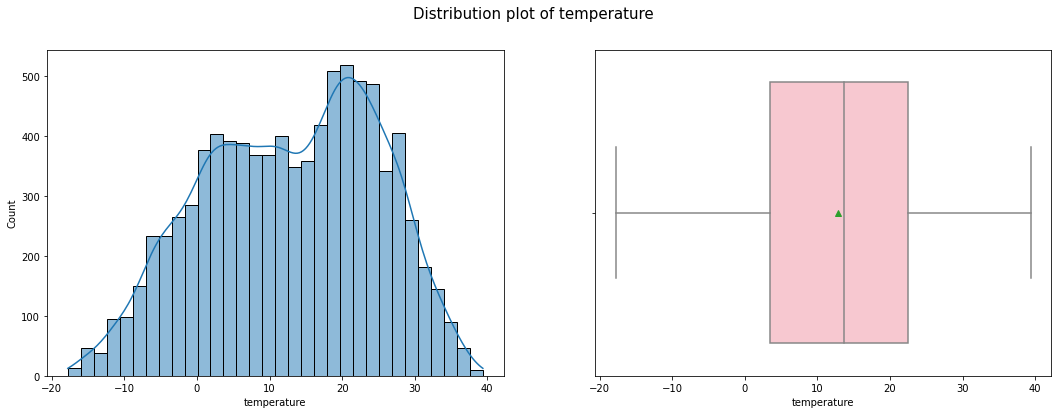

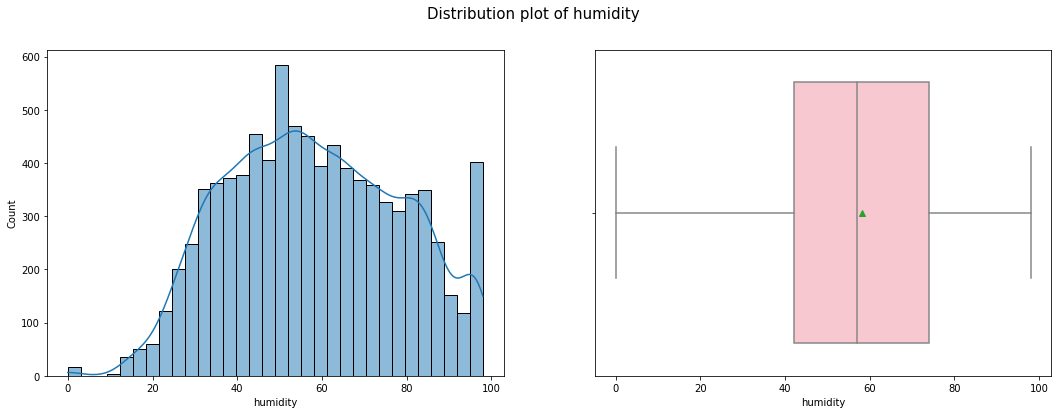

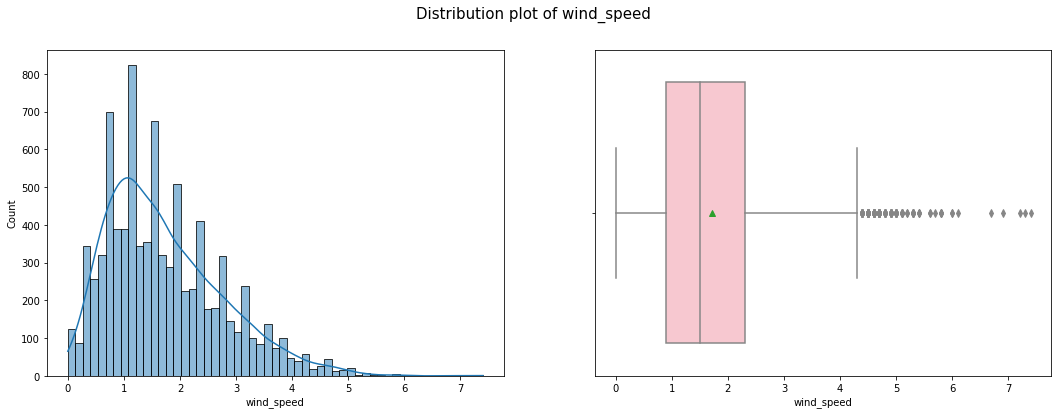

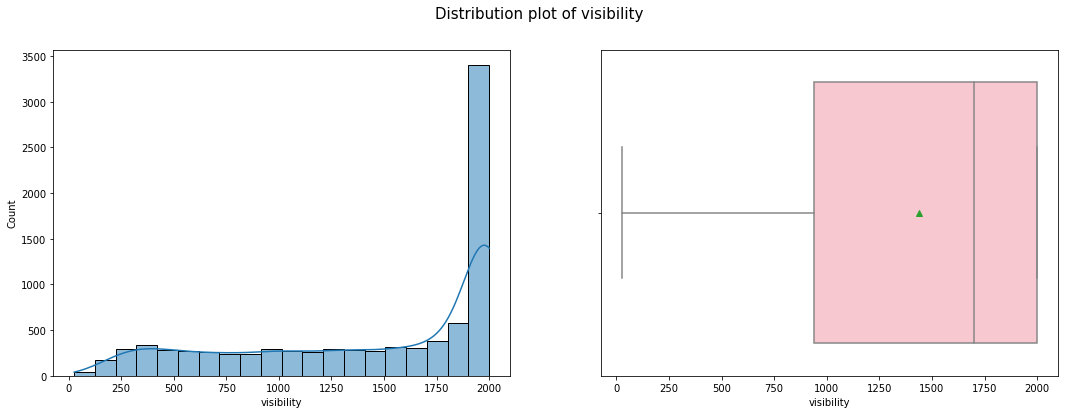

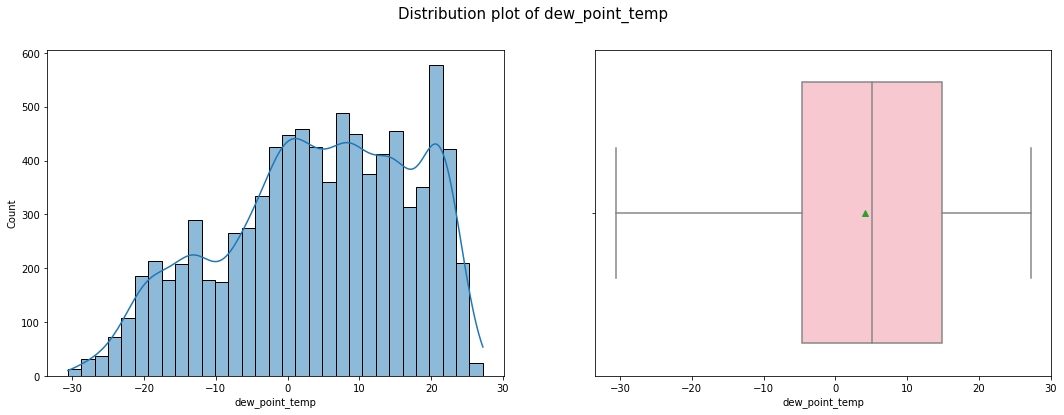

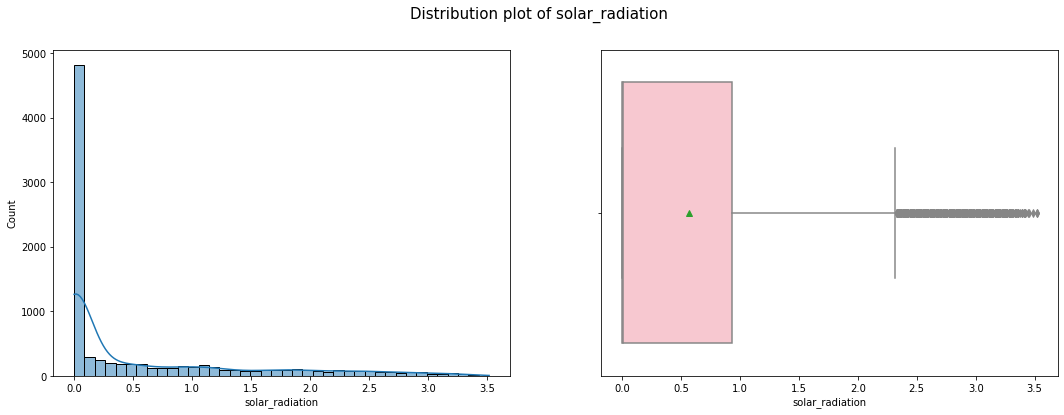

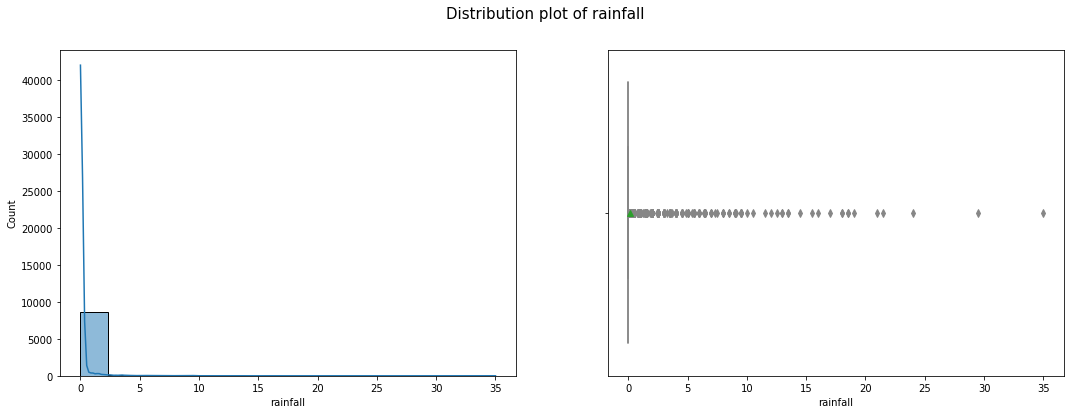

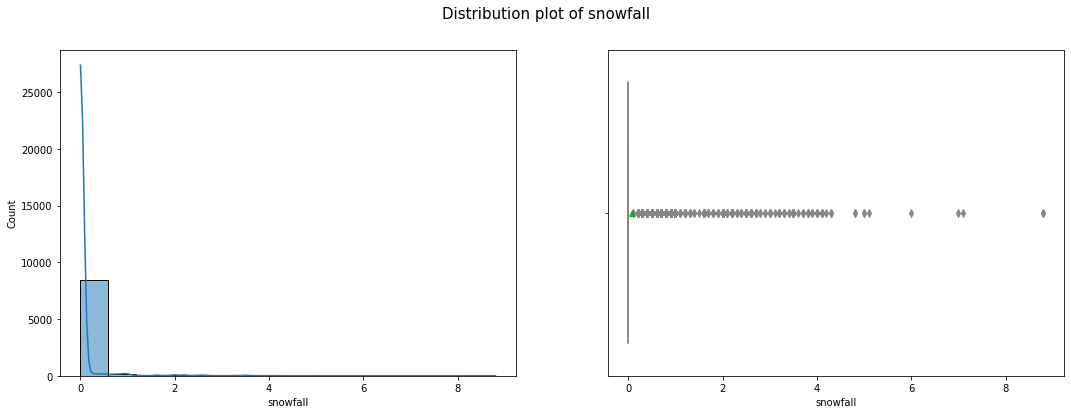

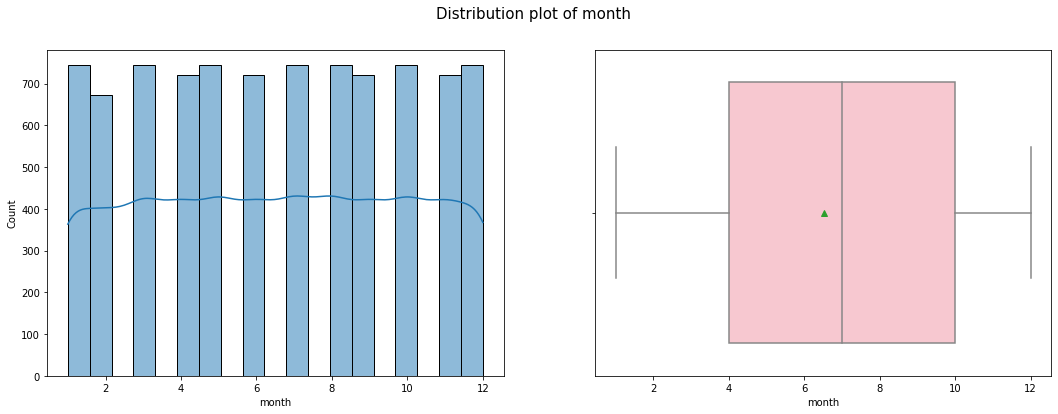

In [36]:
# Chart - 1 visualization code (Distribution and boxplot plot of contentious variables)

for col in cont_col:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.histplot(df[col], ax = axes[0],kde = True)
    sns.boxplot(df[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()


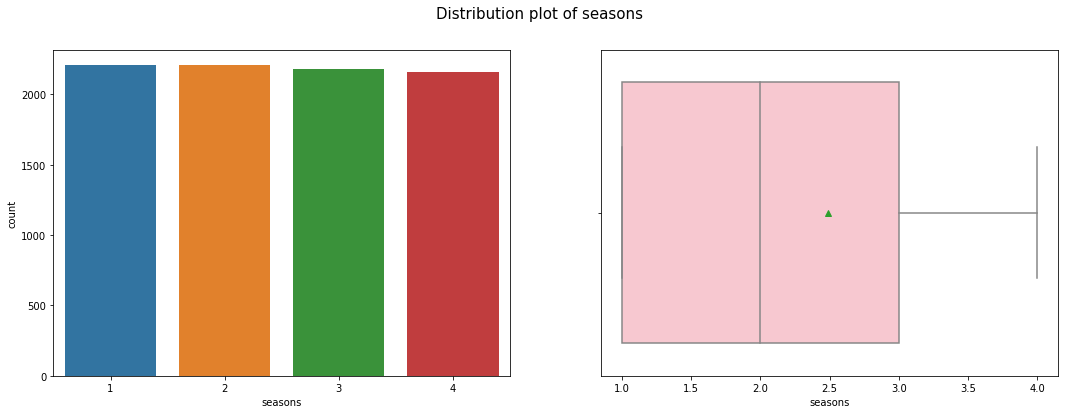

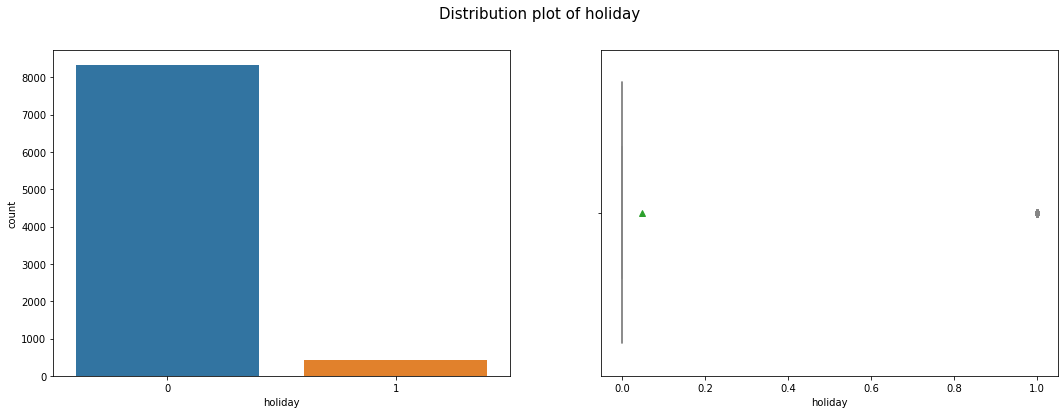

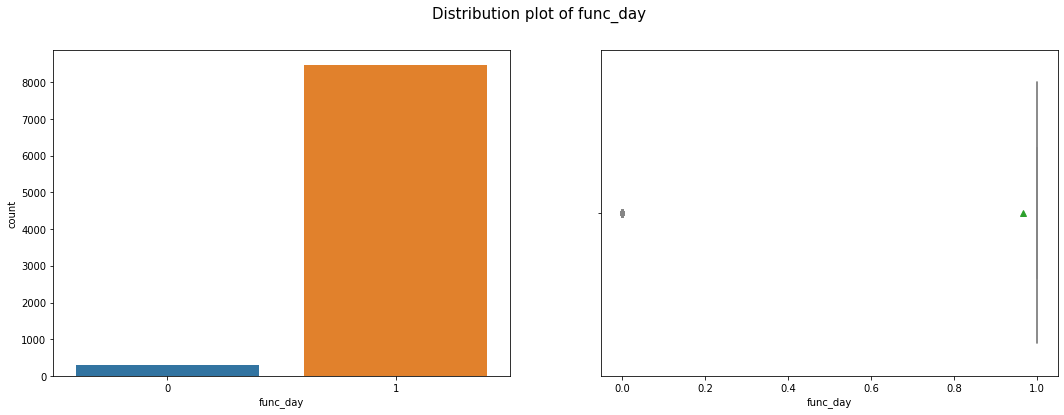

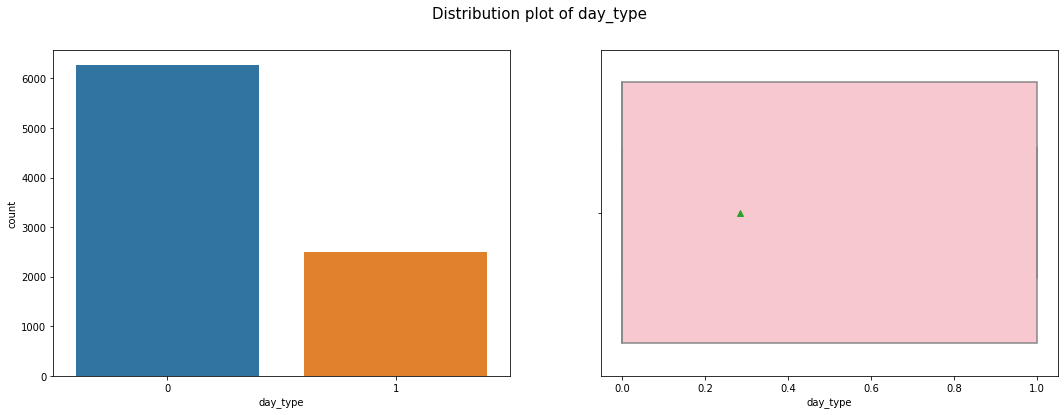

In [37]:
# Chart - 1 visualization code (count and box plot of categorical variables)

for col in cat_col:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.countplot(df[col], ax = axes[0])
    sns.boxplot(df[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

- A histogram plot illustrates data distribution by showing the occurrence frequency of values or groups. It's helpful for spotting trends and outliers, especially in sizable datasets. 
- On the other hand, a box plot summarizes statistical characteristics like median, quartiles, and range. It's used to detect outliers, compare multiple datasets, and understand data spread.
- Count plots visualize categorical variable frequencies, aiding in identifying dominant or rare categories for informed decision-making.
So these graphs makes visualize the diffrent variables.

##### 2. What is/are the insight(s) found from the chart?

From above univariate analysis of all continuous feature variables. We got to know that only tempture and humidity columns are looks normally distributed others shows the different distributions, and we can see that there are outlier values in snowfall, rainfall, wind speed & solar radiation columns in the categorical vaiables season has a evenly count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the time histograms and box plots offer insights into data distribution but don't provide a comprehensive view. They focus on showcasing how a column's data is spread across the dataset, highlighting distribution patterns.

#### Chart - 3 Relation between Month and Rented Bike Count 

**Now lets see visualization of other Variables vs dependent Variable. (Bivariate A)**
- Exploring the relationship between each variable and the target variables or one variable vs other. This analysis will allow us to understand how each variable is associated with the presence or absence of these diseases. We can use techniques like bar charts to visualize the distributions of the target variables based on different categories or levels of other variables.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month')]

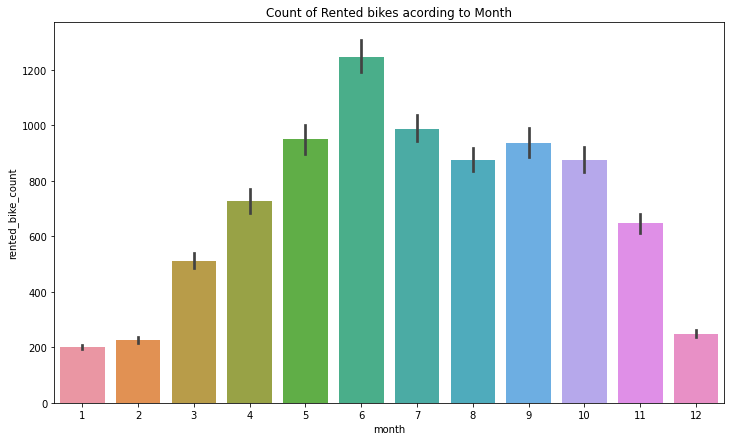

In [38]:
# Chart - 3 visualization code
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=df,x='month',y='rented_bike_count',ax=ax)
ax.set(title='Count of Rented bikes acording to Month')

##### 1. Why did you pick the specific chart?

- Bar charts are used to compare the size or frequency of different categories or groups of data. 
- Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
- To show the distribution of the rented bike count with other categorical variables(here month) i used bar charts.

##### 2. What is/are the insight(s) found from the chart?

- From the above bar plot we can clearly say that, in the month june has heighest count for rented bike and May to October the demand of the rented bike is high as compare to other months.These months came inside the summer season.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, we can focus on summer months.

#### Chart - 4 Relation between Hour and Rented bike count

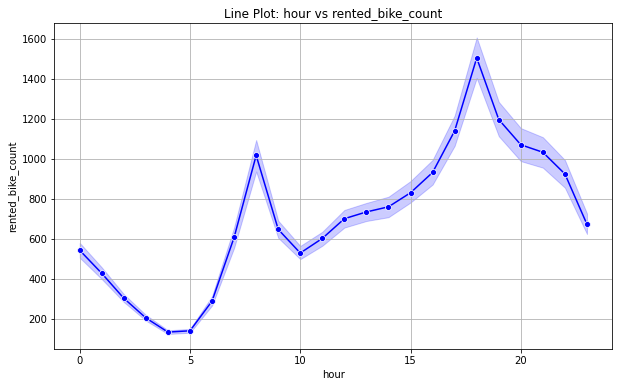

In [39]:
# Chart - 4 visualization code

plt.figure(figsize=(10, 6))
sns.lineplot(df['hour'], df['rented_bike_count'], marker='o', linestyle='-', color='b')
plt.title('Line Plot: hour vs rented_bike_count')
plt.xlabel('hour')
plt.ylabel('rented_bike_count')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A line plot, referred to as a line chart or line graph, provides a means to depict the trajectory of a single variable's evolution over time. By connecting data points with lines, it illustrates the fluctuations in the variable's value as time progresses.

To explore the distribution of rented bike demand across 24 hours, a line plot will be the best choice, so i adopted this.

##### 2. What is/are the insight(s) found from the chart?

- From above line plot we can clearly see that there is high demand in the morning and in the evening.
- Generally people use rented bikes during hour from 7am to 9am and 5pm to 7pm

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The data analysis highlights higher bike demand in the morning and evening. To capitalize on this trend, the business should focus on meeting and managing demand during these peak times.

#### Chart - 5 Relation between weather features and dependent variable.

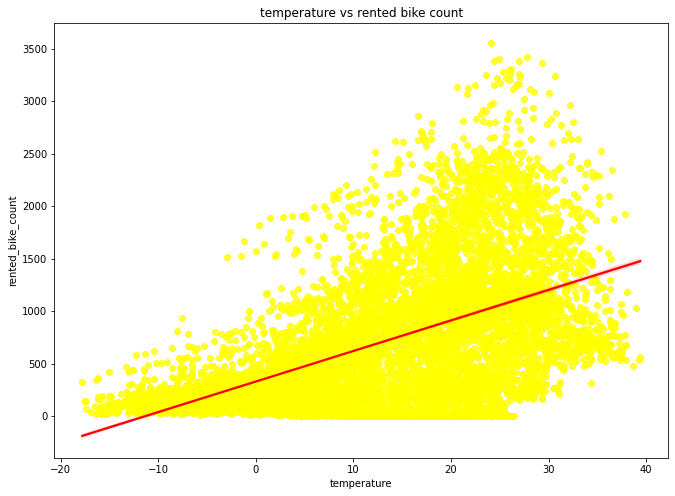

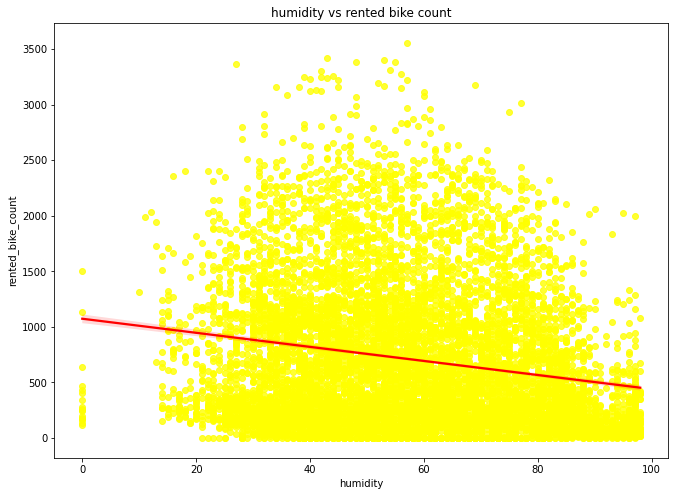

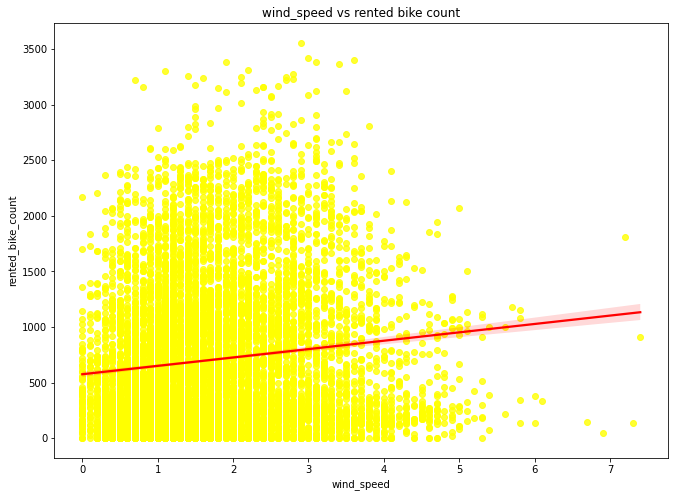

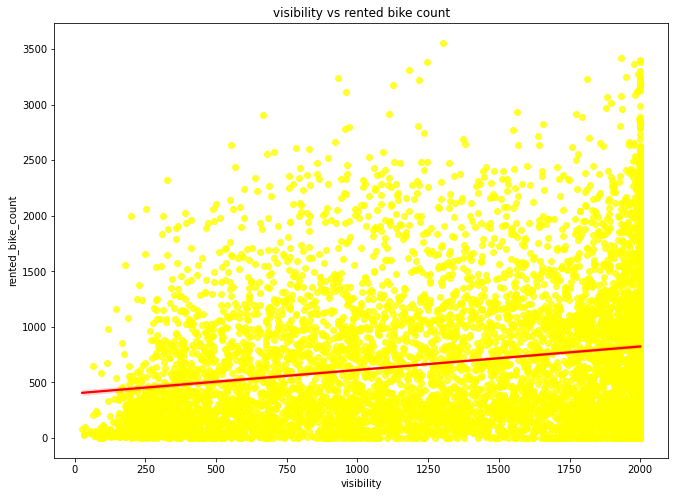

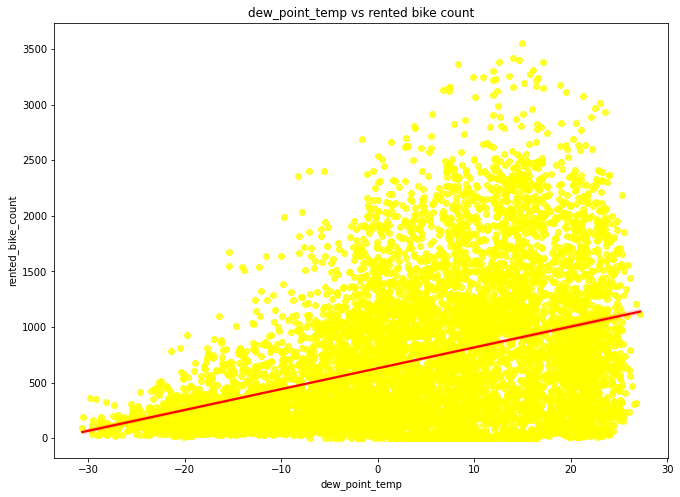

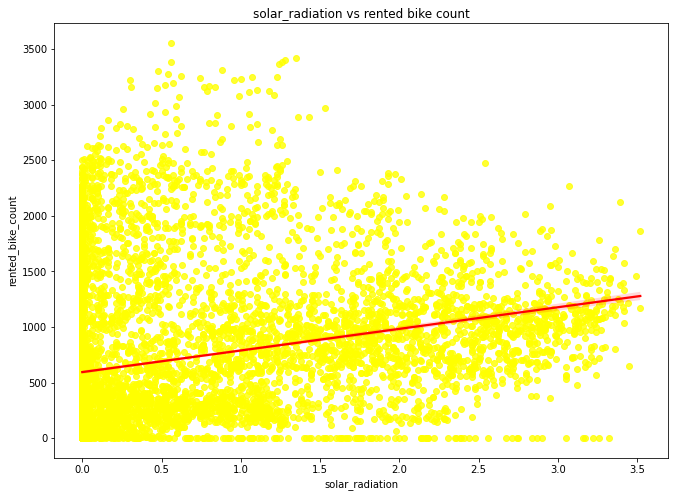

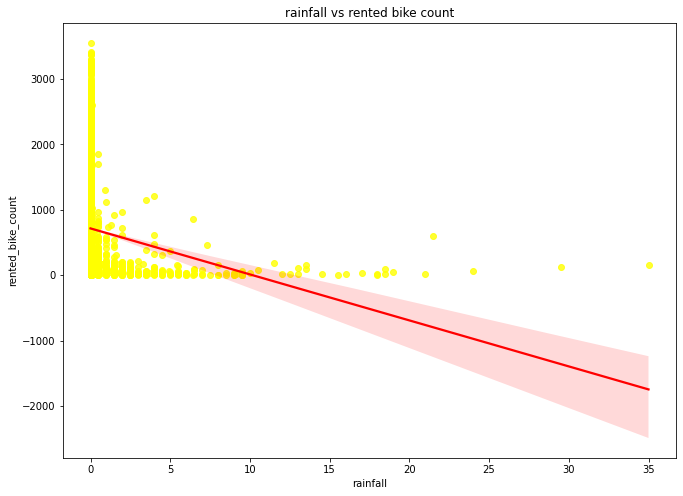

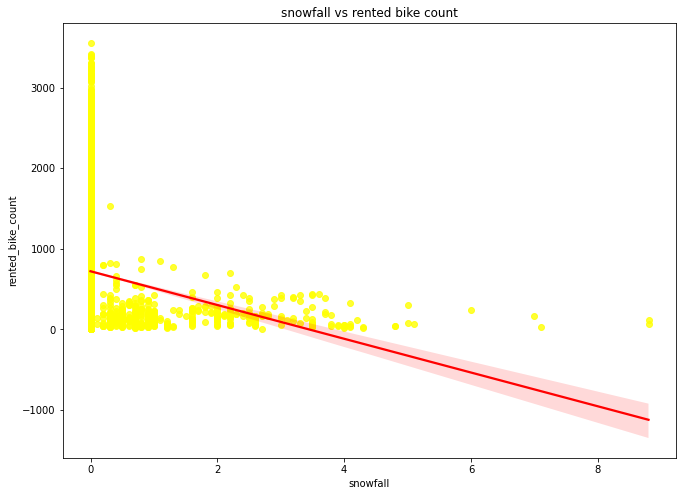

In [40]:
# Chart - 5 visualization code

# Analyzing the relationship between the dependent variable and the weather related variables
for col in weather_col:
  plt.figure(figsize=(11,8))
  sns.regplot(x=col,y=df['rented_bike_count'],data=df,scatter_kws={'color': 'yellow'}, line_kws={'color': 'red'})
  plt.xlabel(col)
  plt.ylabel('rented_bike_count')
  plt.title(col+' vs '+ 'rented bike count')
  plt.show()

##### 1. Why did you pick the specific chart?

The regplot function used to construct a scatter plot along with a linear regression line. Its primary role lies in visualizing the connection between two continuous variables. This aids in the detection of data patterns and trends, while also serving as a tool for assessing the presence of linearity and the independence of these variables.

To examine the patterns between an independent variable and the dependent variable related to rented bike counts, this regplot was adopted.

##### 2. What is/are the insight(s) found from the chart?

- From the above regression plot of features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable, which means the rented bike count increases with increase of these features.

- 'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, through this analysis, certain variables have exhibited discernible patterns with the dependent variable. These variables potentially hold significance as influential features when predicting rented bike counts. Consequently, it's crucial for the business to allocate attention to these variables during the prediction process.

#### Chart - 6 Checking variation between weather features and dependent variable

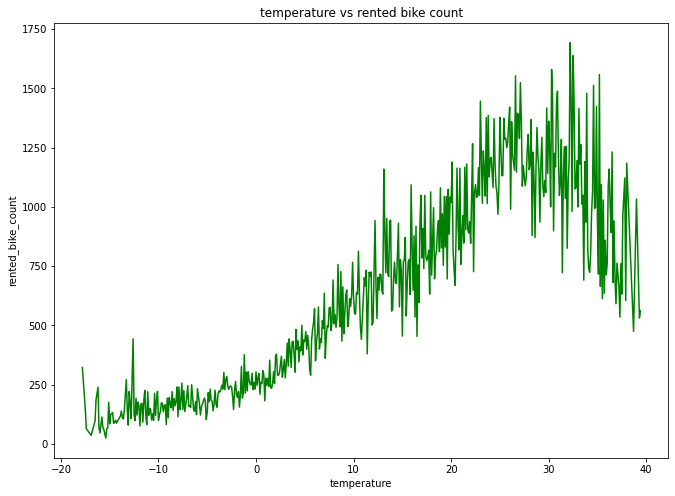

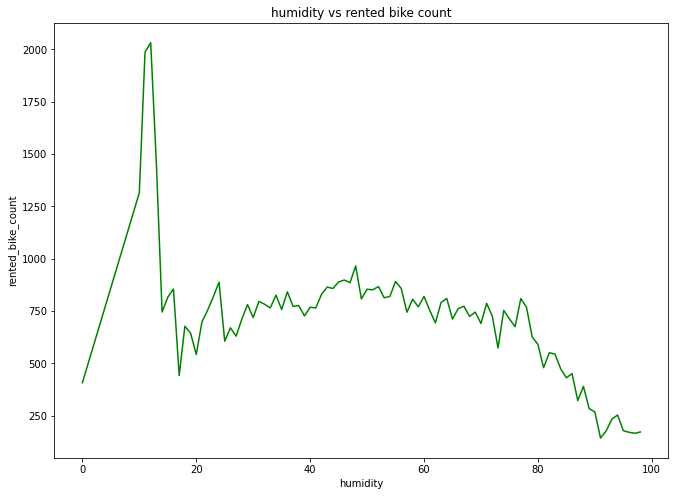

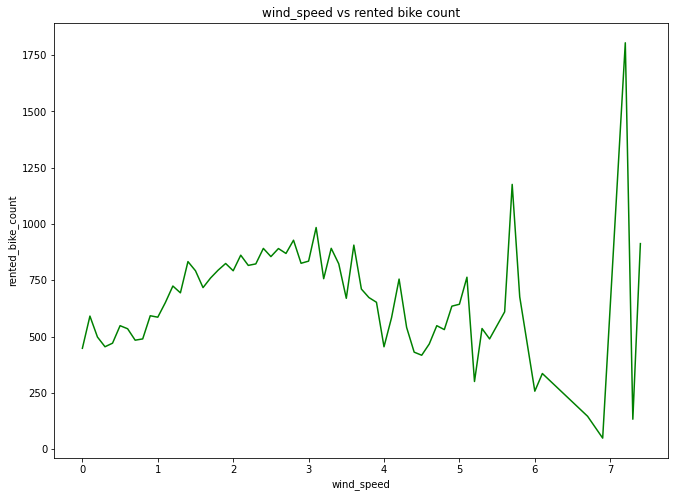

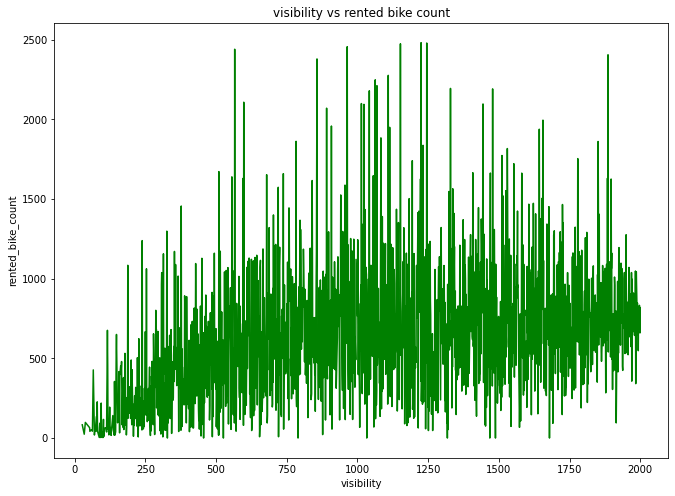

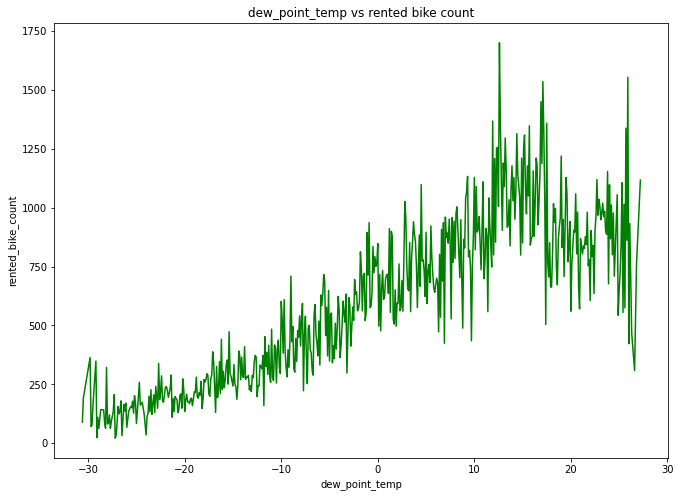

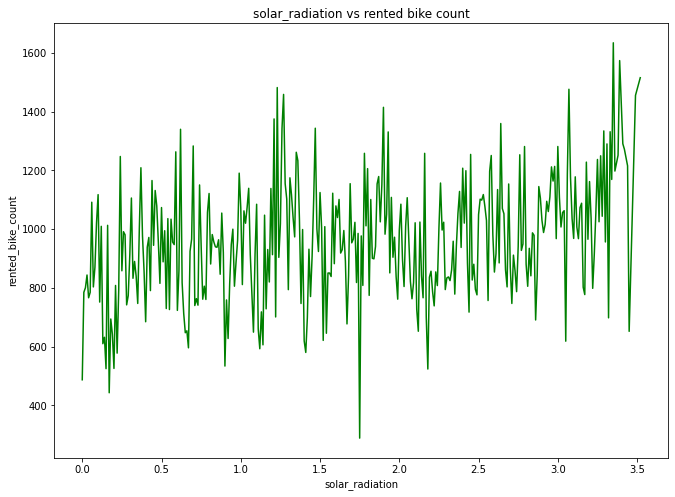

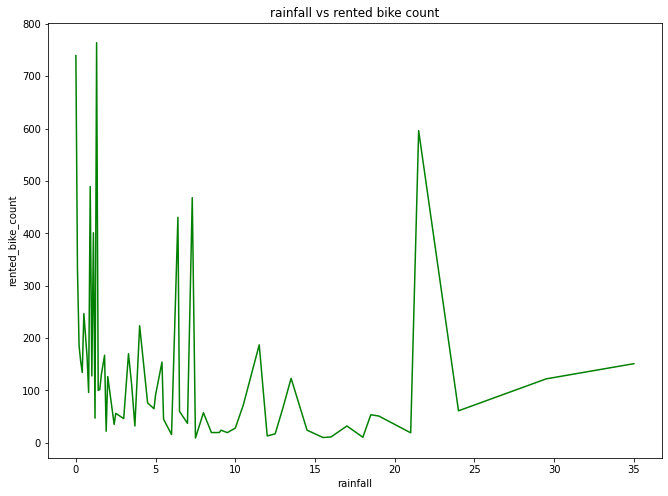

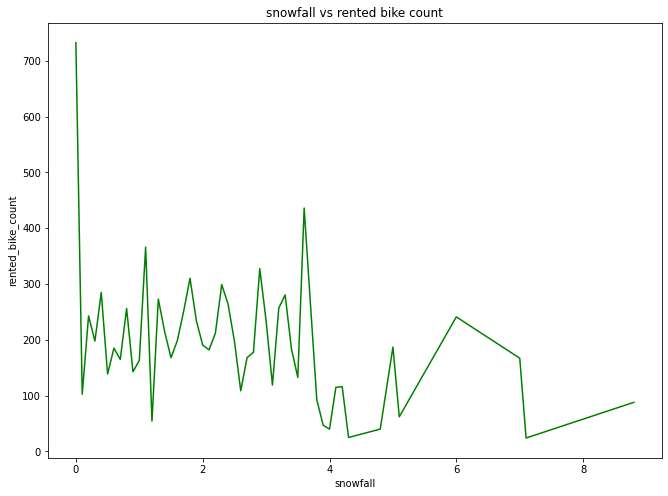

In [41]:
# Chart - 6 visualization code
for col in weather_col:
  plt.figure(figsize=(11,8))
  df.groupby(df[col]).mean()['rented_bike_count'].plot(color='green')
  plt.xlabel(col)
  plt.ylabel('rented_bike_count')
  plt.title(col+' vs '+ 'rented bike count')
  plt.show()


##### 1. Why did you pick the specific chart?

A line plot, referred to as a line chart or line graph, provides a means to depict the trajectory of a single variable's evolution over time. By connecting data points with lines, it illustrates the fluctuations in the variable's value as time progresses.

To explore the distribution of rented bike demand across numerical vaiables, a line plot will be the best choice, so i adopted this.

##### 2. What is/are the insight(s) found from the chart?

- From the temp plot we can see that, people like to ride bikes when it is pretty hot around 25°C in average.
- From the plot of "Dew_point_temperature', is almost same as the 'temperature' there is some similarity present we can check it in our next step.-
- From the solar radiation plot we see that, the amount of rented bikes is huge, when there is solar radiation, the count of rents is around 100
- From the plot snowfall that, on the y-axis, the amount of rented bike is very low. When we have more than 4 cm of snow, the bike rents is much lower
- From the rainfall plot that, even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes
- From the wind speed plot that, the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind is 7 m/s then the demand of bike also increase that clearly means people love to ride bikes when its little windy.
- From the dewpoint plot we can see that, people like to ride bikes when it is pretty hot around 15 in average.
- From the visibilty plot that, the demand of rented bike is uniformly distribut.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, we can focus on those values that have positive variation of rented bike with other varaibles.

#### Chart - 7 Categorical variables with dependent variable (bivariate)

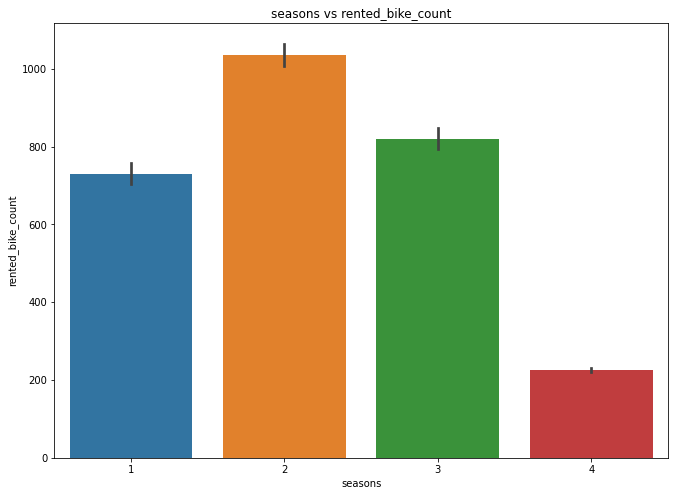

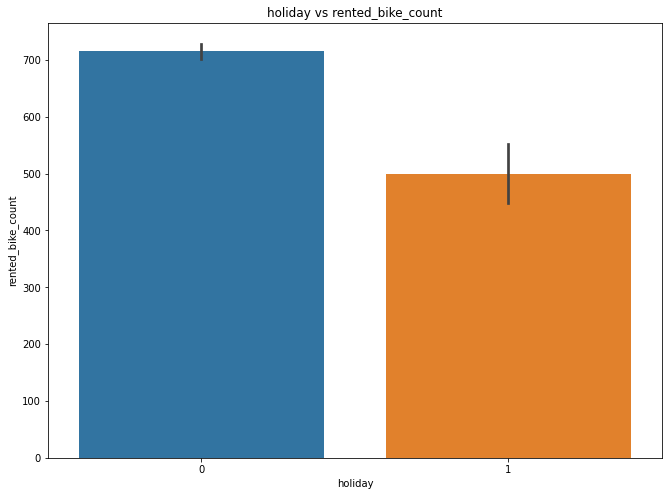

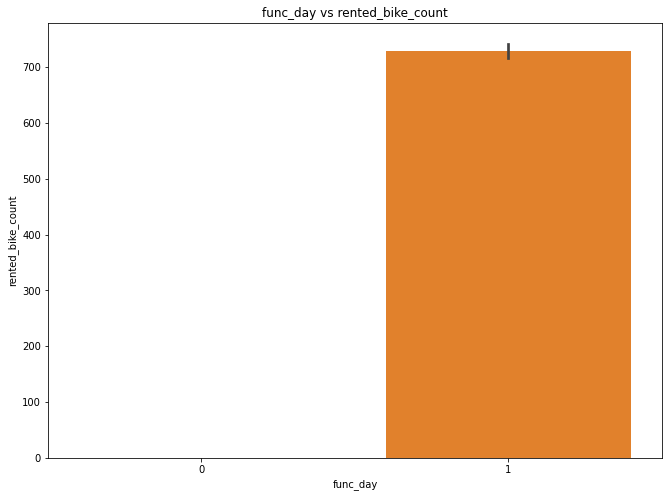

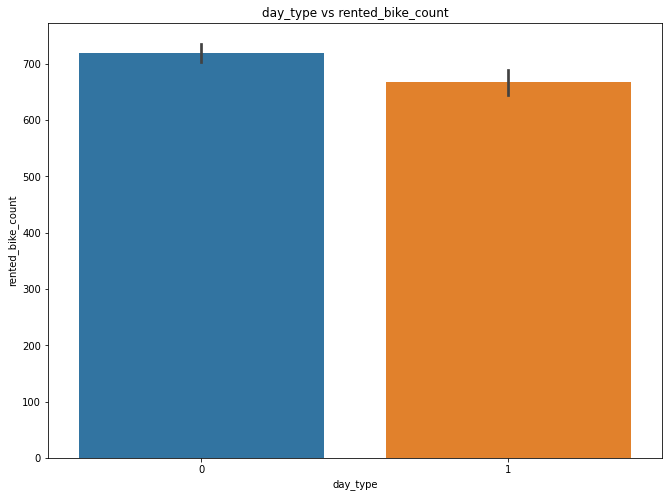

In [42]:
# Chart - 7 visualization 
for col in cat_col:
  plt.figure(figsize=(11,8))
  sns.barplot(x=col,y=df['rented_bike_count'],data=df)
  plt.xlabel(col)
  plt.ylabel('rented_bike_count')
  plt.title(col+' vs '+ 'rented_bike_count')
  plt.show()

##### 1. Why did you pick the specific chart?

Bar charts serve as tools to contrast the magnitude or occurrence of distinct categories or data groups. These charts prove valuable in assessing data disparities among diverse categories and provide a concise means to showcase substantial data volumes within a confined area.

To see the distribution of rented bike counts in relation to various categorical variables, i utilized bar charts.

##### 2. What is/are the insight(s) found from the chart?

- From season vs rented bike chart there is more demand in summer and less demand in winter.
- There is high demand on working days.
- There is no demand on non func days.
- There is high demand on week days.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insights are going to provide some positive business impact, beacause analysing the demand on the basis of categorical varible we got know that when demand for bike is more so we can focus more on that portion.

#### Chart - 8 Aanalysing how dependent variable is variying throughout the day with diffrent independent variables.

**Multivariate Analysis:** Studying the interactions between different variables and how they collectively relate to the target variables. This analysis will help us uncover complex relationships and patterns that may not be apparent in the univariate or bivariate analyses. Techniques such as scatter plots, correlation matrices, and 3D visualizations can be utilized to gain deeper insights into the data

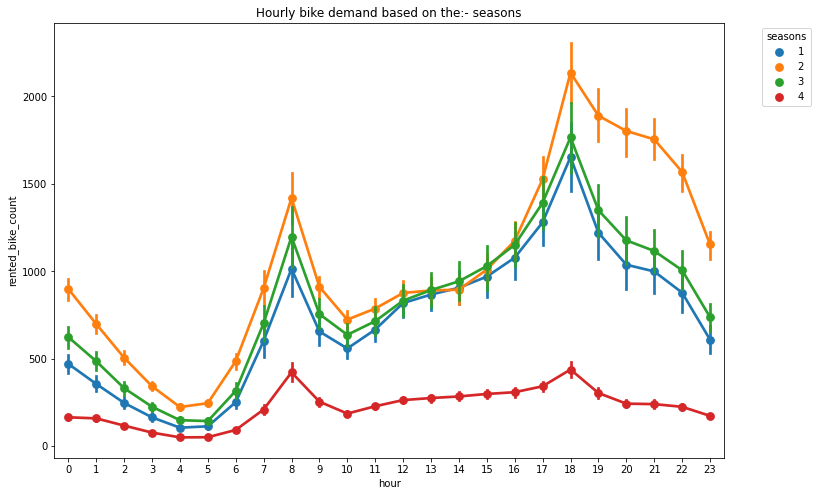

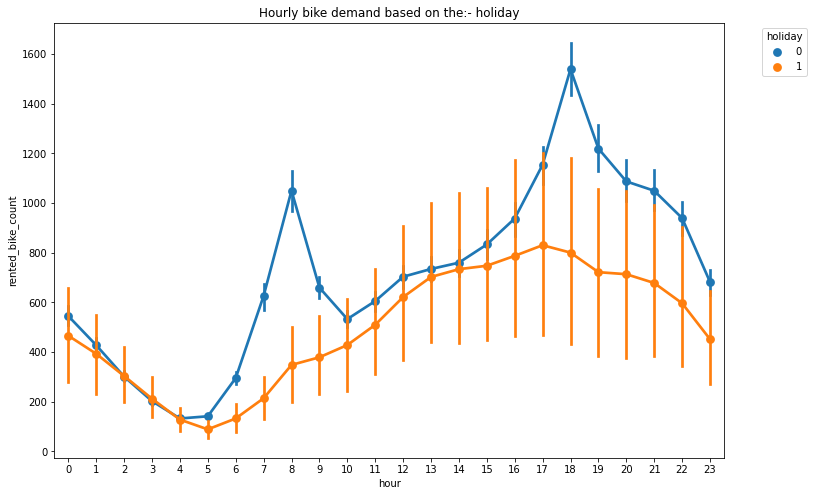

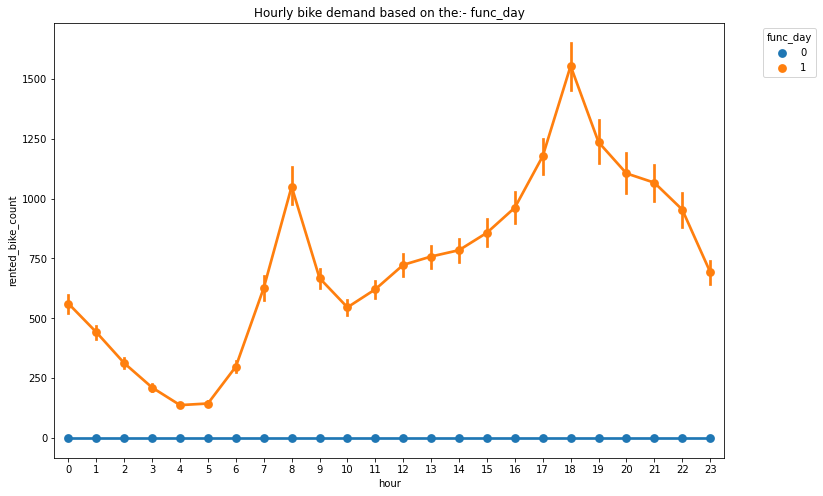

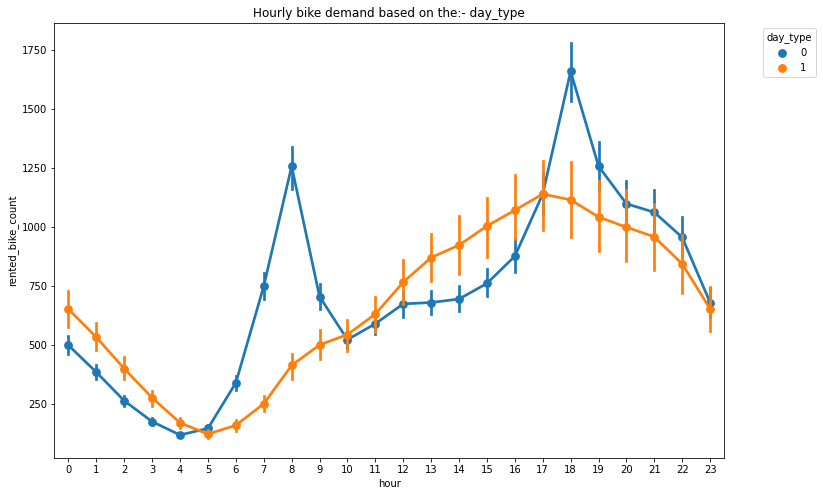

In [43]:
# Chart - 8 visualization code
for col in cat_col:
  if col == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(12,8))
    sns.pointplot(data=df, x='hour', y='rented_bike_count', hue=col, ax=ax)
    plt.title('Hourly bike demand based on the:- '+col)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=col)
    plt.show()

##### 1. Why did you pick the specific chart?

A line plot, referred to as a line chart or line graph, provides a means to depict the trajectory of a single variable's evolution over time. By connecting data points with lines, it illustrates the fluctuations in the variable's value as time progresses.

To explore the distribution of rented bike demand across categirical vaiables with respect to day time a line plot will be the best choice, so i adopted this.

##### 2. What is/are the insight(s) found from the chart?

* From above line plots we see that :

- In winter season there is no significant demand even in the morning or in the evening, around 3 months in winter season (i.e December, January & February) there is low demand.
- On the functional day (i.e No Holiday) there is spike in morning and in evening, but that is not there on Holidays.
- On weekend almost throught the day there is demand.
- On non functional day there is no demand.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this analysis we figure out some key factors such as high demand in morning and evening slot in all the season

#### Chart - 9 - Correlation Heatmap

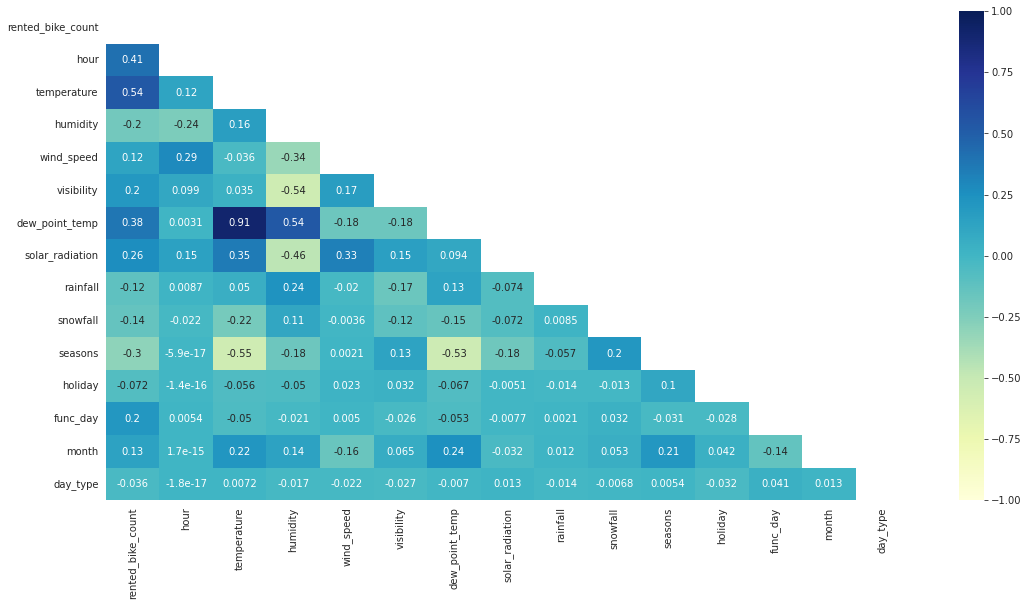

In [49]:
# Correlation Heatmap visualization code

corr = df.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

##### 1. Why did you pick the specific chart?

The correlation coefficient measures how closely two variables move together in a linear manner. A correlation matrix summarizes these relationships among multiple variables, helping us decide which variables are important for a model. The correlation value can range from -1 to 1.

To easily grasp how different variables relate and their correlation strengths, we've used a correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From the provided correlation map, a few notable observations emerge:

1. **Strong Relationships**: We notice significant multicollinearity between certain independent variables, like temperature and dew point temperature, humidity and dew point temperature, as well as between the weekend and day of the week variables.

2. **Correlation with Dependent Variable**: The temperature, hour, dew point temperature, and solar radiation display notable correlations with the dependent variable, rented bike count.

3. **Limited Correlation**: Apart from the mentioned correlations, there appears to be relatively minimal correlation between other variables.

In simpler terms, the map helps us identify close links between variables and understand their impact on bike rentals.

#### Chart - 10 - Pair Plot 

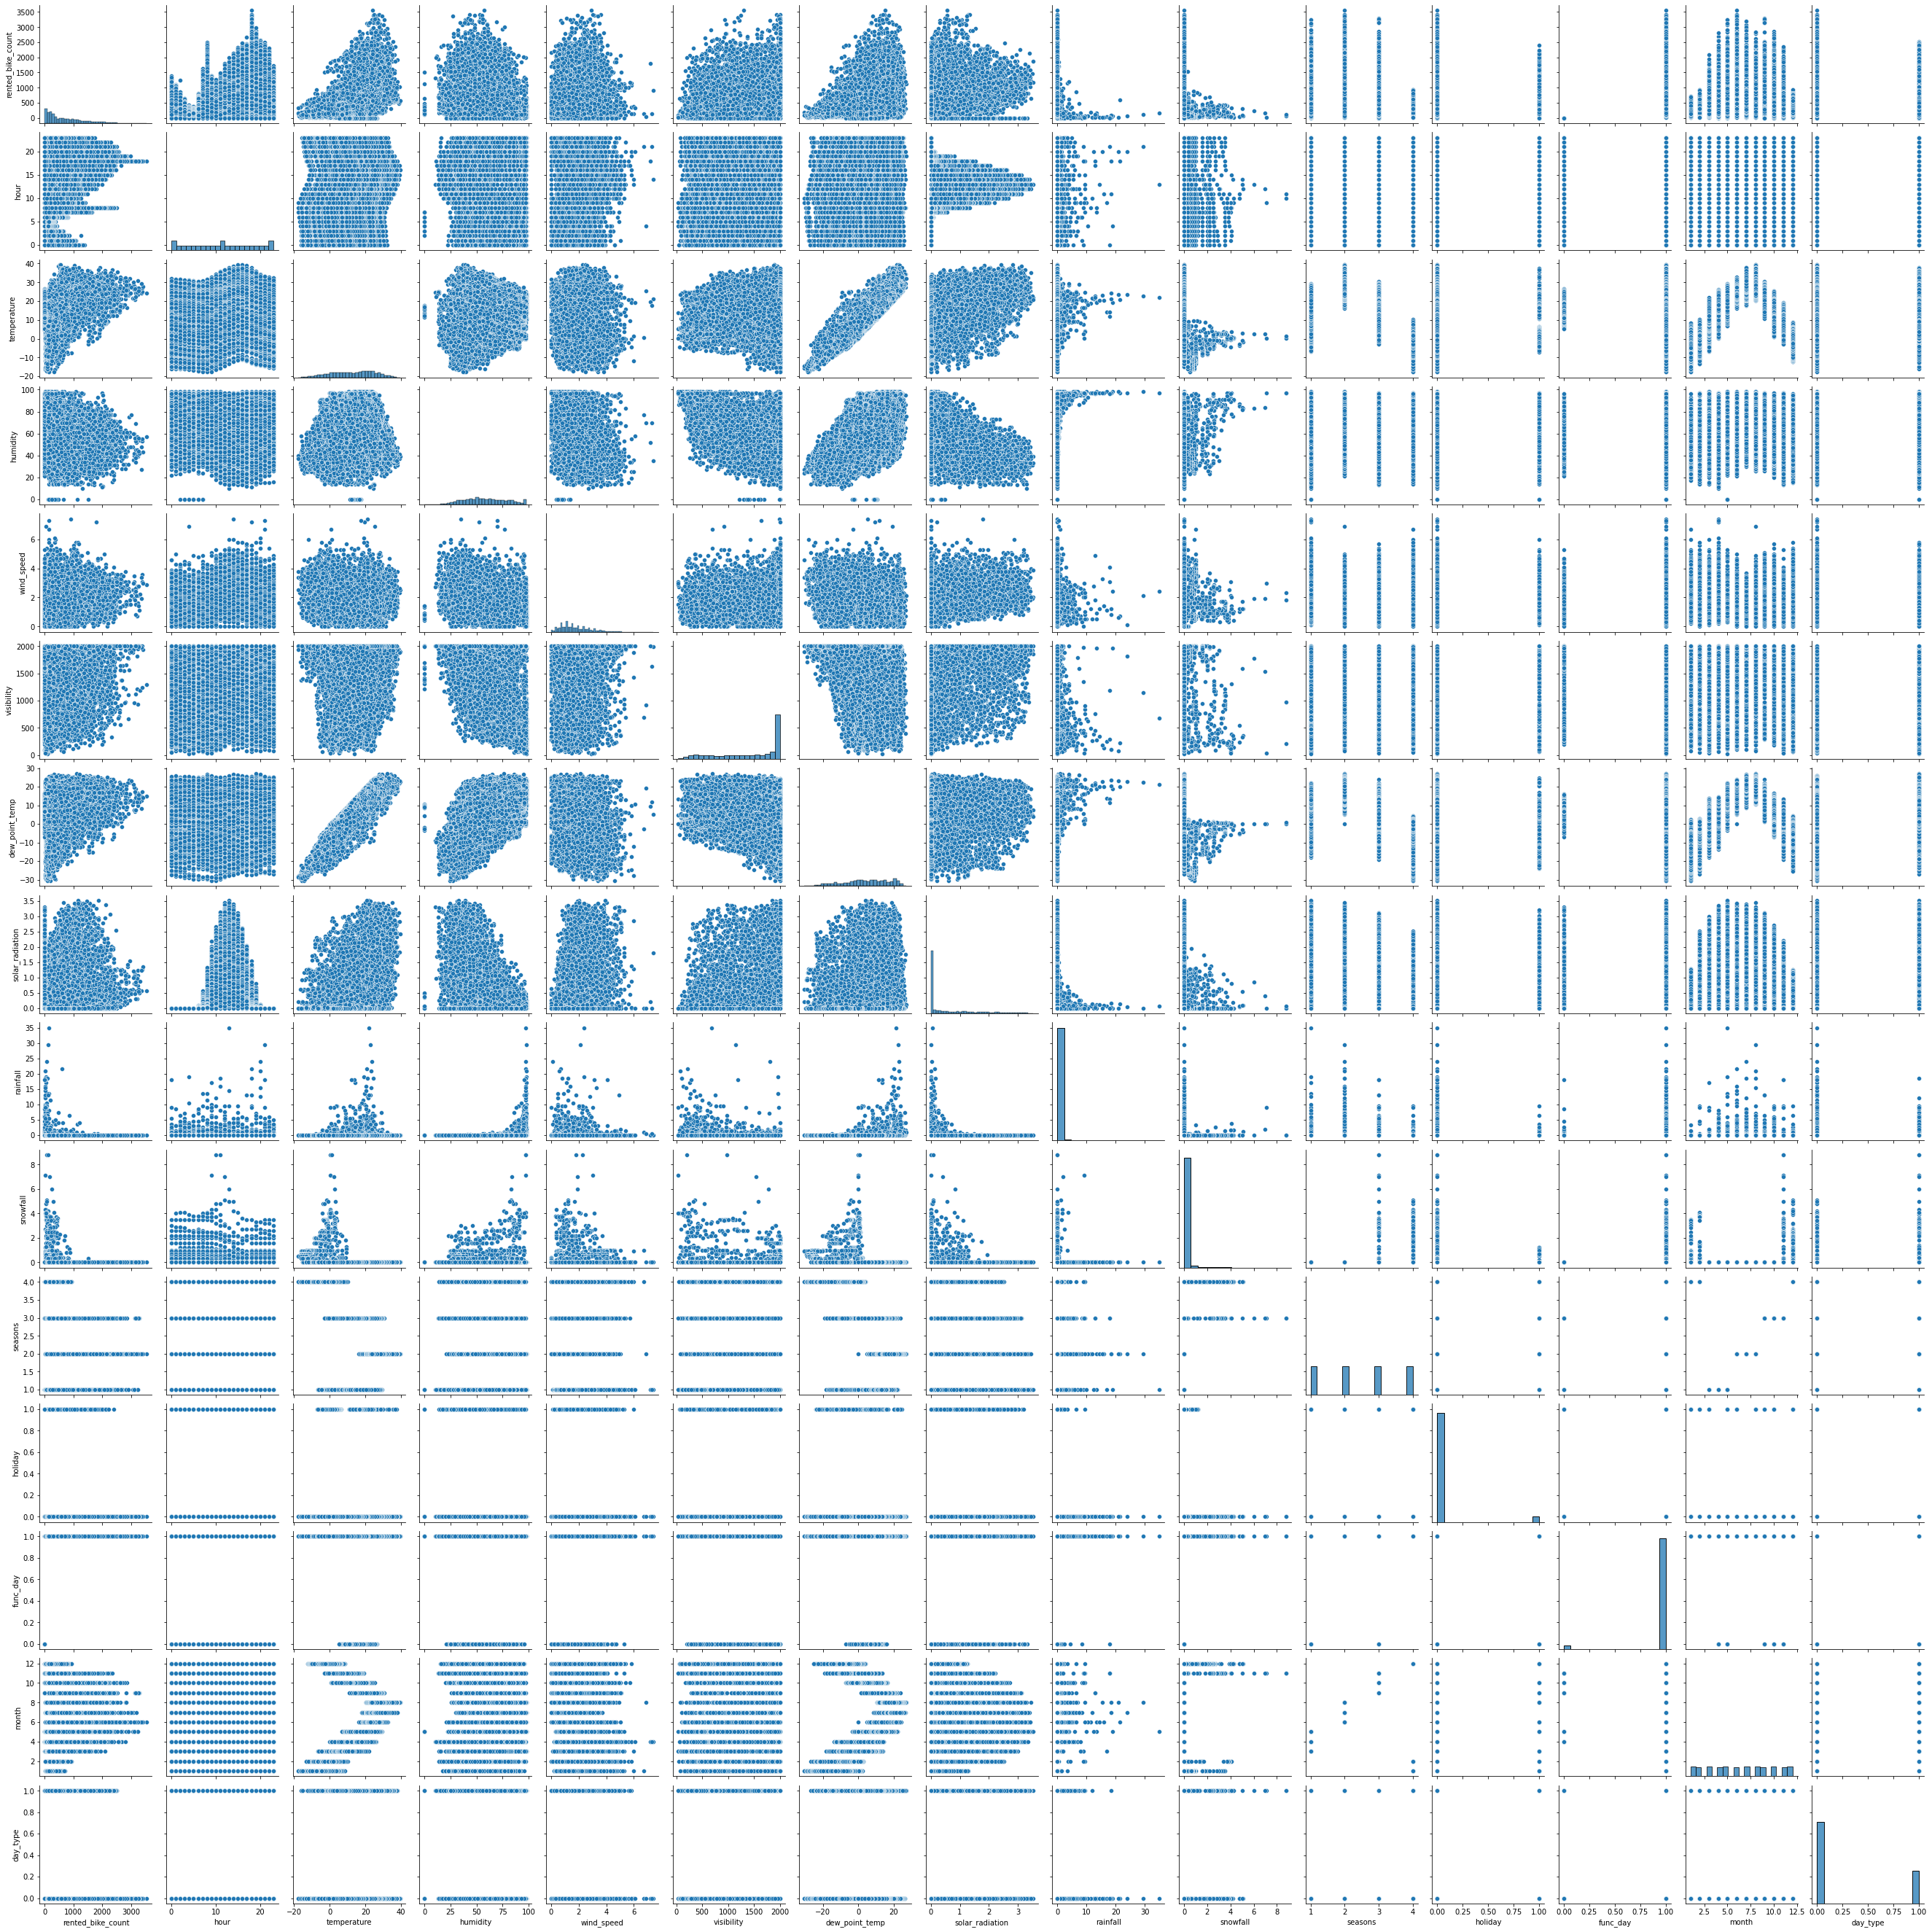

In [50]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, often called a scatterplot matrix, gives you a way to see how different variables in your data relate to each other. It's like looking at all possible pairs of variables and their scatter plots in one view. This helps you explore the patterns and connections between features in your data.

So, we used a pair plot to study the data patterns and relationships between different features. It's similar to the correlation map, but here you get a visual representation of these relationships.

##### 2. What is/are the insight(s) found from the chart?

By examining the pair plot, we've found that most variables don't show a straightforward straight-line connection. Except for dew point temperature, temperature, and solar radiation, there's a lack of evident relationships among the variables.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

From our analysis of the data, we observed that the variable we're interested in doesn't appear to follow a normal distribution. To work with this, we assumed that the data is normally distributed and proceeded to perform statistical analysis.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null hypothesis (H0) : The distrubution of a dataset is normal.
- Alternate hypothesis(H1) : The distrubution of a dataset is not normal.

#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro
test_data = df['rented_bike_count']

stats,p  = shapiro(test_data)                                       # mostly used to check normallity of data.
print('stats = %.2f, p=%.3f' % (stats,p))

print("Reject null hypothesis") if p <= 0.05 else print('Accept null hypothesis') # short hand if-else

stats = 0.88, p=0.000
Reject null hypothesis


##### Which statistical test have you done to obtain P-Value?

The use of the Shapiro-Wilk statistical test adopted a p-value obtained below the threshold of 0.05.

##### Why did you choose the specific statistical test?

The Shapiro-Wilk test is used to see if sample data follows a normal distribution. This matters for statistical analysis. The test outcome guides whether data needs changing or if different analysis methods should be used.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H0): The temperature does not have a significant effect on the number of rented bike counts.
- Alternate Hypothesis (H1): The temperature does have a significant effect on the number of rented bike counts.

#### 2. Perform an appropriate statistical test.

In [52]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

corr_coeff, p_value = stats.pearsonr(df['temperature'], df['rented_bike_count'])
alpha = 0.05                                                        # Set the significance level (alpha)

print("Reject the null hypothesis.") if p_value < alpha else print("Fail to reject the null hypothesis.") # Make a decision based on the p-value

Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

I used the Pearson correlation coefficient for hypothesis testing

##### Why did you choose the specific statistical test?

When you have two continuous variables and you want to test the relationship between them, you typically use the Pearson correlation coefficient for hypothesis testing. The Pearson correlation coefficient measures the strength and direction of a linear relationship between two continuous variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H0): The means of the rented bike count are equal across all categories of the holidy.
- Alternate Hypothesis (H1): At least one mean of the rented bike count differs across categories of the holidy.

#### 2. Perform an appropriate statistical test.

In [174]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
category_1 = df["rented_bike_count"][df["holiday"] == 0]            # Separate the continuous variable based on categories of the categorical variable
category_2 = df["rented_bike_count"][df['holiday'] == 1]

f_statistic, p_value = stats.f_oneway(category_1, category_2)       # Perform ANOVA
alpha = 0.05                                                        # Set the significance level (alpha)
if p_value < alpha:
    print("Reject the null hypothesis.There are significant differences in means across categories") 
else:
    print("Fail to reject the null hypothesis.Means are not significantly different across categories") # Make a decision based on the p-value.

Reject the null hypothesis.There are significant differences in means across categories


##### Which statistical test have you done to obtain P-Value?

Performed ANOVA test.

##### Why did you choose the specific statistical test?

ANOVA tests multiple group means' differences efficiently, reducing errors from multiple tests and identifying sources of variation.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [54]:
# Handling Missing Values & Missing Value Imputation
df.isna().mean()*100

rented_bike_count    0.0
hour                 0.0
temperature          0.0
humidity             0.0
wind_speed           0.0
visibility           0.0
dew_point_temp       0.0
solar_radiation      0.0
rainfall             0.0
snowfall             0.0
seasons              0.0
holiday              0.0
func_day             0.0
month                0.0
day_type             0.0
dtype: float64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values in the dataset.

### 2. Handling Outliers

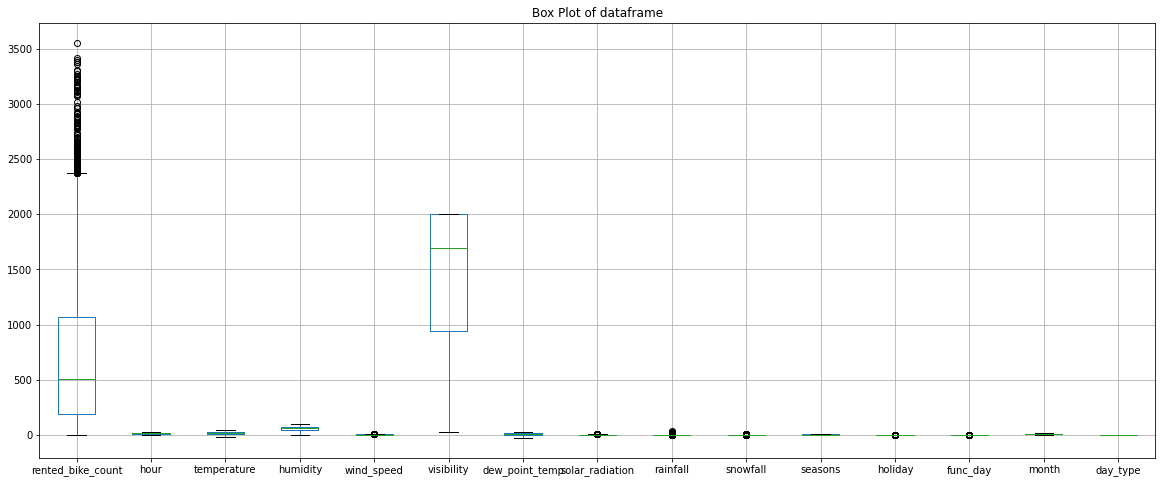

In [55]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(20, 8))
df.boxplot()                                                        # Visual Inspection - Box Plot
plt.title('Box Plot of dataframe')
plt.show()

In [56]:
q1, q3, median = df.rented_bike_count.quantile([0.25,0.75,0.5])     # Removing outliers by Using IQR method:
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)

df['rented_bike_count'] = np.sqrt(df['rented_bike_count'] )

for col in ['wind_speed','solar_radiation','rainfall','snowfall']:  # Removing outliers by Capping:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

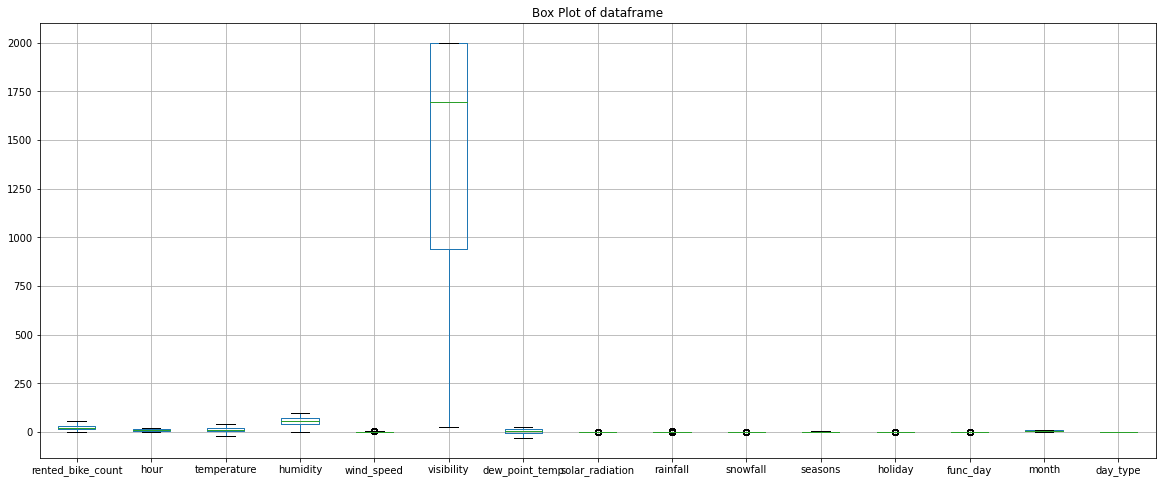

In [57]:
plt.figure(figsize=(20, 8))
df.boxplot()                                                        # Visual Inspection - Box Plot
plt.title('Box Plot of dataframe')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used two techniques to handle outliers. One involved finding limits based on the spread of the data, while the other involved setting a maximum value for extreme data points. For the "rented bike count," I applied a mathematical adjustment to better understand its pattern.

### 3. Categorical Encoding

- In a dataset, you might find different kinds of information, including categories like names or labels. To work well with these categories in programming, we create special versions called "dummy variables." These are like codes that computers understand. One-hot encoding is a way to make these codes even more helpful. It helps make categories clearer and more useful in programming.

- In short, one-hot encoding makes categories easier for computers to understand, especially for things like machine learning. It's like translating categories into numbers so that the computer can use them effectively

In [58]:
df.head()

rented_bike_count  hour  temperature  humidity  wind_speed  visibility  \
0          15.937377     0         -5.2        37         2.2        2000   
1          14.282857     1         -5.5        38         0.8        2000   
2          13.152946     2         -6.0        39         1.0        2000   
3          10.344080     3         -6.2        40         0.9        2000   
4           8.831761     4         -6.0        36         2.3        2000   

   dew_point_temp  solar_radiation  rainfall  snowfall  seasons  holiday  \
0           -17.6              0.0       0.0       0.0        4        0   
1           -17.6              0.0       0.0       0.0        4        0   
2           -17.7              0.0       0.0       0.0        4        0   
3           -17.6              0.0       0.0       0.0        4        0   
4           -18.6              0.0       0.0       0.0        4        0   

   func_day  month  day_type  
0         1     12         0  
1         1     12         0  
2         1     12         0  
3         1     12         0  
4         1     12         0

In [59]:
# Encode your categorical columns
df = pd.get_dummies(df, columns = ['hour', 'month'])

In [60]:
df.columns

Index(['rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'func_day', 'day_type', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

- For the columns 'seasons', 'holiday', 'func_day', 'day_type' replace function is used as there were less no of unique values.
- For columns hour and month i used one hot encoding.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

Not required.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

- From EDA we came to know that the columns 'temperature','dew_point_temp' are heighly correlated we can see in below code also, so we cna make one feature from that, so we can take avrage of them.

In [72]:
# Manipulate Features to minimize feature correlation and create new features
df[['temperature','dew_point_temp']].corr()

temperature  dew_point_temp
temperature        1.000000        0.912798
dew_point_temp     0.912798        1.000000

In [73]:
df['average_temperature'] = (df['temperature'] + df['dew_point_temp']) / 2 # Creating a new column for average temperature
df.drop(['temperature','dew_point_temp'],inplace = True,axis=1)

In [74]:
weather_col.remove('dew_point_temp')
weather_col.remove('temperature')
weather_col.append('average_temperature')

In [75]:
df.columns

Index(['rented_bike_count', 'humidity', 'wind_speed', 'visibility',
       'solar_radiation', 'rainfall', 'snowfall', 'seasons', 'holiday',
       'func_day', 'day_type', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'average_temperature'],
      dtype='object')

#### 2. Feature Selection

- **Feature Selection:** In the presence of multicollinearity, it might be wise to consider removing one of the correlated variables to improve the model's interpretability and performance. VIF provides guidance on which variables might need to be dropped

In [76]:
weather_col

['humidity',
 'wind_speed',
 'visibility',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'average_temperature']

In [77]:
# Select your features wisely to avoid overfitting
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_cal(data):
    vif = pd.DataFrame()                                            # Calculating VIF         
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return(vif)

In [78]:
vif_cal(df[[i for i in weather_col]])

variables       VIF
0             humidity  5.221826
1           wind_speed  4.266271
2           visibility  4.518817
3      solar_radiation  2.069999
4             rainfall  1.166966
5             snowfall  1.142187
6  average_temperature  2.204413

##### What all feature selection methods have you used  and why?

- I used a method called the "Pearson correlation coefficient" to see how strongly different variables are related to each other, and also how they relate to the main variable we're interested in.

- Additionally, I looked for a phenomenon called "multicollinearity" using something called the "Variance Inflation Factor" (VIF). Multicollinearity happens when variables are highly connected to each other, which can confuse our analysis. So, I checked for this and removed any variables that were causing problems due to their strong connections with other variables.

##### Which all features you found important and why?

- Using the methods mentioned earlier, we discovered a strong connection between the "temperature" and "dew point temperature" variables. To address this, I decided to calculate the average of these two variables and create a new variable called "average_temperature" by avraging their values.
- Follwing are the features selected for the model training.

In [79]:
print(df.shape)
df.columns

(8760, 48)


Index(['rented_bike_count', 'humidity', 'wind_speed', 'visibility',
       'solar_radiation', 'rainfall', 'snowfall', 'seasons', 'holiday',
       'func_day', 'day_type', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'average_temperature'],
      dtype='object')

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

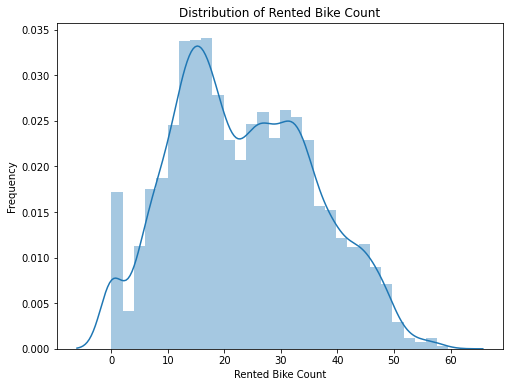

In [80]:

plt.figure(figsize=(8, 6))
sns.distplot( x=df['rented_bike_count'], bins=30, kde=True)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()      

- We made a distribution plot of our data and also checked its normality using the Shapiro-Wilk test. The results showed that our data doesn't follow a normal distribution, so it needed some changes. We measured the skewness and found that the "rented bike" data was skewed in a certain direction.

- I applied a square root transformation, at the time of the outlier handelling step and it made our data look more like a normal distribution. The skewness was reduced, and our data became more suitable for analysis.

### 6. Data Scaling

In [81]:
# Scaling your data
scale_features = [i for i in df.columns if i not in ['rented_bike_count']] # separating the col for scaling

In [82]:
scaler = StandardScaler()
x = scaler.fit_transform(df[scale_features])
y = df['rented_bike_count']

##### Which method have you used to scale you data and why?

**StandardScaler** The StandardScaler is a preprocessing technique in machine learning used for scaling or normalizing the features of a dataset. It's a part of data preprocessing, specifically data normalization, which aims to ensure that different features have similar scales so that machine learning algorithms can work effectively.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In this problem statement we dont require dimesionality reduction as alredy dimenssion is small.

### 8. Data Splitting

In [83]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 0)

##### What data splitting ratio have you used and why? 

- To build and evaluate our model, we divided the dataset into two parts: training data and testing data. We allocated 80% of the data for training and the remaining 20% for testing.

- The reason for using a 20% test split and an 80% train split is a common practice in machine learning. This split aims to strike a balance between having enough data to train the model effectively and having enough data to assess its performance accurately

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In a regression problem, the concept of "imbalanced dataset" doesn't directly apply in the same way as it does in classification problems.
In a regression problem, you're predicting a continuous numeric value, not class labels.

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [88]:
# created one user defined regression model function which takes model and splitted data as a i/p and gives the metrics and graphs of metrics as o/p.

def reg_model(model, x_train, y_train, x_test, y_test):   
    model.fit(x_train, y_train)                                     # model fitting
    y_pred_train = model.predict(x_train)                           # y prediction on train data
    y_pred_test = model.predict(x_test)                             # y prediction on test data
    print('Evaluation metrics for Training data')
# ************************************************************ Train Data *******************************************************************
    train_mse = mean_squared_error(y_train, y_pred_train)           # calculation of MSE on train data
    print("MSE on training data :",train_mse)
    train_rmse = np.sqrt(train_mse)                                 # calculation of RMSE on train data          
    print("RMSE on training data :",train_rmse)

    train_mae = mean_absolute_error(y_train, y_pred_train)          # calculation of MAE on train data
    print("MAE on training data :",train_mae)

    train_r2 = r2_score(y_train, y_pred_train)                      # calculation of R2 Score on train data
    print("R2 score on training data :",train_r2)
    train_r2_adj = 1-(1-train_r2)*((len(x_test)-1)/(len(x_test)-x_test.shape[1]-1)) # calculation of adjusted R2 Score on train data
    print("Adjusted R2 score on training data :",train_r2_adj)
    print('Evaluation metrics for testing data')
# ************************************************************ Test Data *******************************************************************
    test_mse = mean_squared_error(y_test, y_pred_test)              # calculation of MSE on test data
    print("MSE on testing data :",test_mse)
    test_rmse = np.sqrt(test_mse)                                   # calculation of RMSE on test data      
    print("RMSE on testing data :",test_rmse)

    test_mae = mean_absolute_error(y_test, y_pred_test)             # calculation of MAE on test data
    print("MAE on testing data :",test_mae)

    test_r2 = r2_score(y_test, y_pred_test)
    print("R2 score on testing data :",test_r2)                     # calculation of R2 Score on test data
    test_r2_adj = 1-(1-test_r2)*((len(x_test)-1)/(len(x_test)-x_test.shape[1]-1)) # calculation of adjusted R2 Score on test data
    print("Adjusted R2 score on testing data :",test_r2_adj)        # will be same for test and train data

    plt.figure(figsize=(18,6))
    plt.plot((y_pred_train)[:100])
    plt.plot((np.array(y_pred_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.title('Actual and Predicted Bike Demand Count', fontsize=18)   # plot actual and predicted values
    
# ******************************************************* Feature importances **************************************************************************
    try:
        importance = model.feature_importances_                     # using try except for feature_importances_ attribute
    except: 
        importance = model.coef_
        importance = np.absolute(importance)
    if len(importance)==len(scale_features):
        pass
    else:
        importance = importance[0]

    feat = pd.Series(importance, index=scale_features)
    plt.figure(figsize=(12,8))
    plt.title('Feature Importances (top 20) for '+str(model), fontsize = 18)
    plt.xlabel('Relative Importance')
    feat.nlargest(20).plot(kind='barh')

    model_score = [train_mse, test_mse, train_rmse, test_rmse, train_mae, test_mae,train_r2, test_r2, train_r2_adj, test_r2_adj]
                                                                    # func will return the metrics
    return model_score

In [89]:
# Data frame to store the metrics of model.
score = pd.DataFrame(index = ['Train_MSE','Test_MSE','Train_RMSE','Test_RMSE','Train_MAE','Test_MAE','Train_R2','Test_R2','Train_Adj_R2','Test_Adj_R2'])

In [90]:
# ML Model - 1 Implementation
lreg_mod = LinearRegression()                # Fit the Algorithm
lreg_mod.fit(x_train, y_train)
y_pred_train_lr = lreg_mod.predict(x_train)  # Predict on the model
y_pred_test_lr = lreg_mod.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Evaluation metrics for Training data
MSE on training data : 31.793432088387885
RMSE on training data : 5.6385664923265635
MAE on training data : 4.2717042021468234
R2 score on training data : 0.7939947592473399
Adjusted R2 score on training data : 0.7883126898134343
Evaluation metrics for testing data
MSE on testing data : 32.0750422625252
RMSE on testing data : 5.663483227001312
MAE on testing data : 4.290021952051397
R2 score on testing data : 0.7963311666846783
Adjusted R2 score on testing data : 0.790713540413657


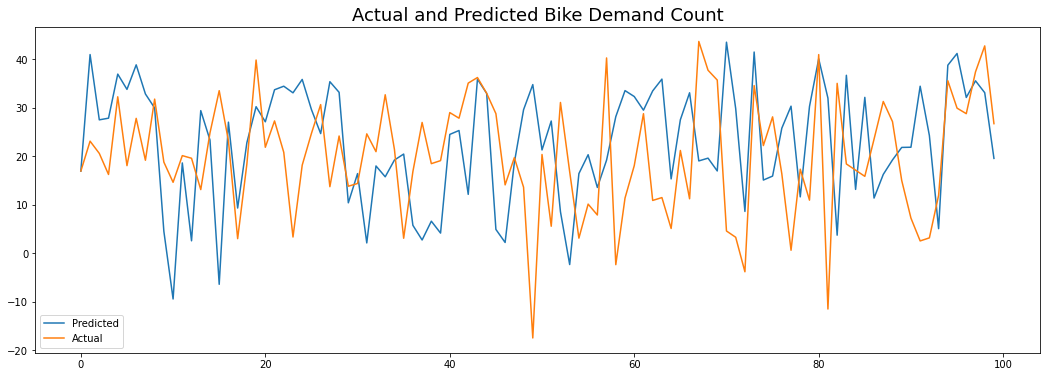

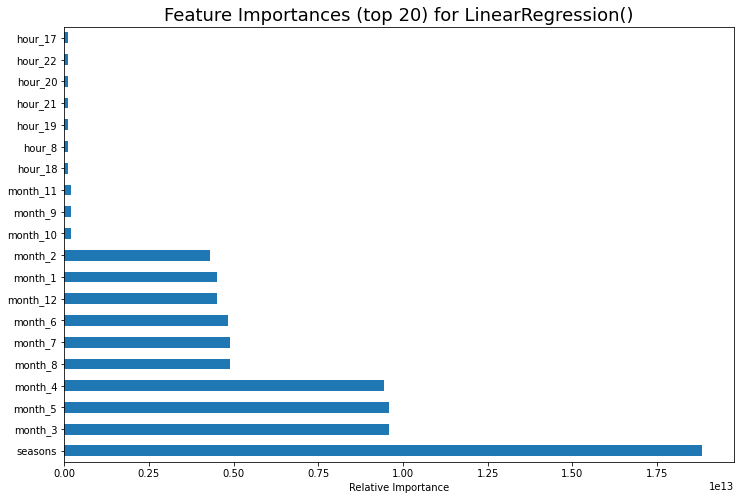

In [92]:
# Visualizing evaluation Metric Score chart
lr_score = reg_model(lreg_mod,x_train, y_train, x_test, y_test)

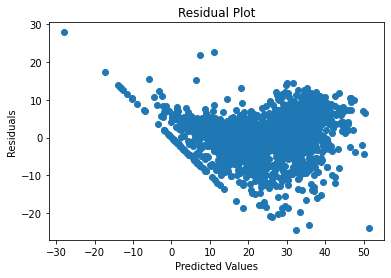

In [93]:
plt.scatter((y_pred_test_lr),(y_test)-(y_pred_test_lr))             # Plot for Heteroscadacity - Residual plot 
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [94]:
# Evaluation Metric Score chart
score['Linear regression'] = lr_score
score

Linear regression
Train_MSE             31.793432
Test_MSE              32.075042
Train_RMSE             5.638566
Test_RMSE              5.663483
Train_MAE              4.271704
Test_MAE               4.290022
Train_R2               0.793995
Test_R2                0.796331
Train_Adj_R2           0.788313
Test_Adj_R2            0.790714

#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lreg_mod_tune = LinearRegression()
param_grid = {'normalize': [True, False]}
grid_search = GridSearchCV(lreg_mod_tune, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(x_train, y_train)                                   # Fit the Algorithm
best_para = grid_search.best_estimator_
best_para.fit(x_train, y_train)
y_pred_train_lr_tune = best_para.predict(x_train) 
y_pred_test_lr_tune = best_para.predict(x_test)                     # Predict on the model

Evaluation metrics for Training data
MSE on training data : 31.793432088387885
RMSE on training data : 5.6385664923265635
MAE on training data : 4.2717042021468234
R2 score on training data : 0.7939947592473399
Adjusted R2 score on training data : 0.7883126898134343
Evaluation metrics for testing data
MSE on testing data : 32.0750422625252
RMSE on testing data : 5.663483227001312
MAE on testing data : 4.290021952051397
R2 score on testing data : 0.7963311666846783
Adjusted R2 score on testing data : 0.790713540413657


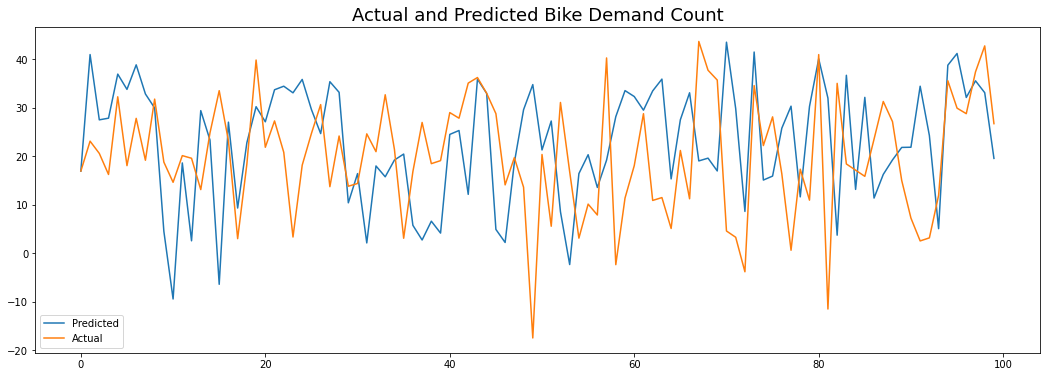

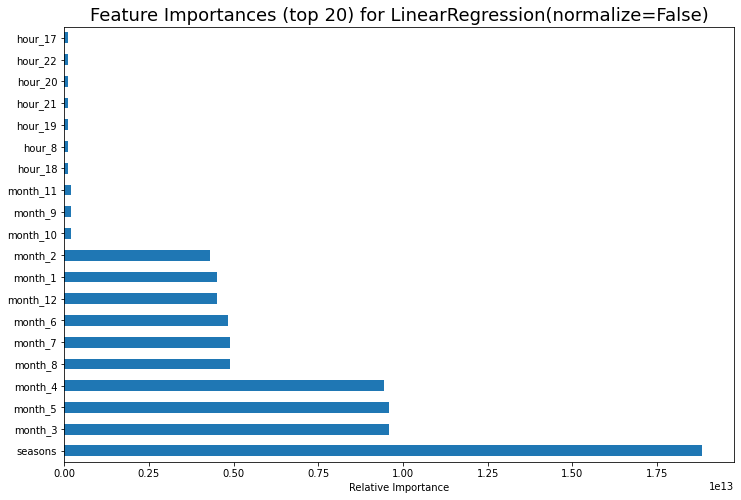

In [96]:
# Visualizing evaluation Metric Score chart
lr_score_tune = reg_model(best_para, x_train, y_train, x_test, y_test)

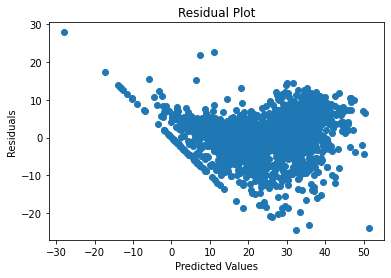

In [97]:
plt.scatter((y_pred_test_lr_tune),(y_test)-(y_pred_test_lr_tune)) # Plot for Heteroscadacity - Residual plot 
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [98]:
score['Linear regression Tune'] = lr_score_tune
score

Linear regression  Linear regression Tune
Train_MSE             31.793432               31.793432
Test_MSE              32.075042               32.075042
Train_RMSE             5.638566                5.638566
Test_RMSE              5.663483                5.663483
Train_MAE              4.271704                4.271704
Test_MAE               4.290022                4.290022
Train_R2               0.793995                0.793995
Test_R2                0.796331                0.796331
Train_Adj_R2           0.788313                0.788313
Test_Adj_R2            0.790714                0.790714

##### Which hyperparameter optimization technique have you used and why?

Here adopted GridSearchCV to automatically find the best parameters for a machine learning model's controls. This prevents the model from becoming too complex or too simple, and i evaluate its performance using cross-validation. This tool can be a time and effort saver compared to manually adjusting the controls.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Despite using GridSearchCV, there was no observed enhancement in the model's performance. The train R2 score remained unchanged. As a result, we opted to proceed with the next regression model.

### ML Model - 2 LASSO Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [99]:
# Import the Lasso Regression class
lasso_reg = Lasso()                                                 # Initialize an instance of the class
lasso_reg.fit(x_train, y_train)                                     # Fit the lasso regression model to your training data
y_pred_test_lasso = lasso_reg.predict(x_test)
y_pred_train_lasso = lasso_reg.predict(x_train)

Evaluation metrics for Training data
MSE on training data : 55.73005398072838
RMSE on training data : 7.465256457800253
MAE on training data : 5.951382984633488
R2 score on training data : 0.6388976454148888
Adjusted R2 score on training data : 0.6289376626299708
Evaluation metrics for testing data
MSE on testing data : 57.431793840691846
RMSE on testing data : 7.5783767286069805
MAE on testing data : 6.061376879395807
R2 score on testing data : 0.6353218695394822
Adjusted R2 score on testing data : 0.6252632591335876


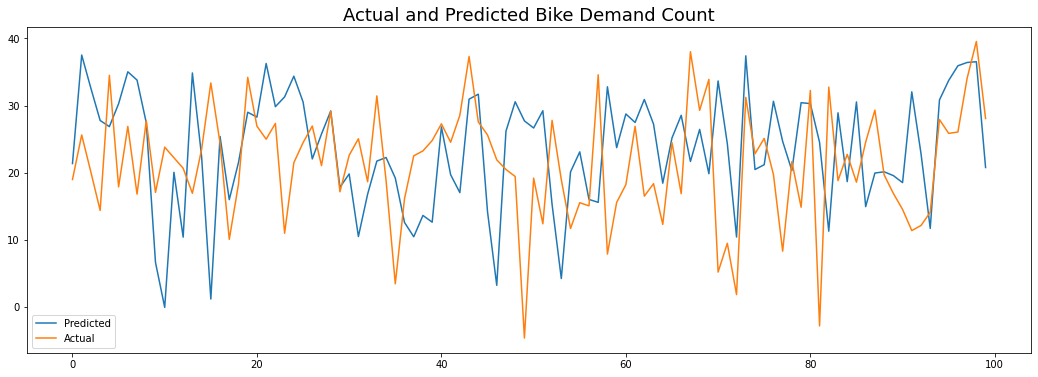

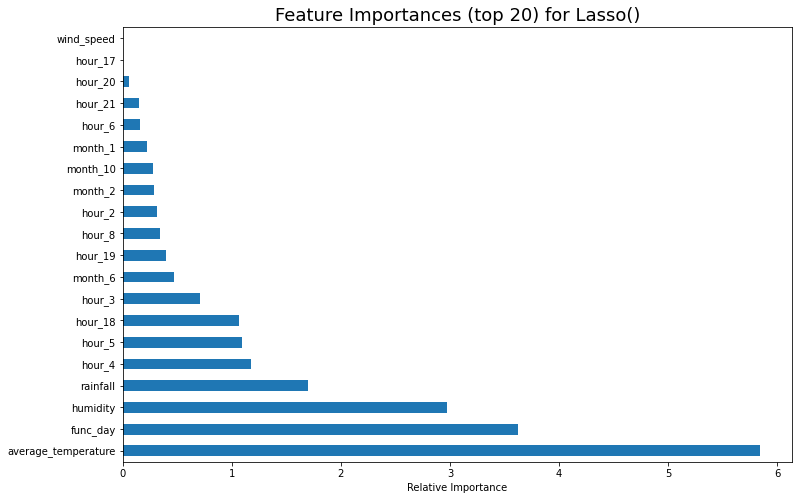

In [100]:
lasso_score = reg_model(lasso_reg, x_train, y_train, x_test, y_test)

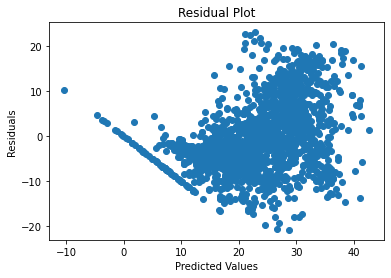

In [101]:
### Heteroscadacity- Residual plot 
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [102]:
score['Lasso regression'] = lasso_score
score

Linear regression  Linear regression Tune  Lasso regression
Train_MSE             31.793432               31.793432         55.730054
Test_MSE              32.075042               32.075042         57.431794
Train_RMSE             5.638566                5.638566          7.465256
Test_RMSE              5.663483                5.663483          7.578377
Train_MAE              4.271704                4.271704          5.951383
Test_MAE               4.290022                4.290022          6.061377
Train_R2               0.793995                0.793995          0.638898
Test_R2                0.796331                0.796331          0.635322
Train_Adj_R2           0.788313                0.788313          0.628938
Test_Adj_R2            0.790714                0.790714          0.625263

#### 2. Cross- Validation & Hyperparameter Tuning

In [103]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso_reg_tune = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso_reg_tune, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train,y_train)                                #fitting model

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [104]:
lasso_reg_tune = Lasso(alpha = lasso_regressor.best_params_['alpha']) # Initialize an instance of the class
lasso_reg_tune.fit(x_train, y_train)                                  # Fit the lasso regression model to your training data
y_pred_lassocv = lasso_reg_tune.predict(x_test)

Evaluation metrics for Training data
MSE on training data : 31.79238887658496
RMSE on training data : 5.638473984739573
MAE on training data : 4.270546727002929
R2 score on training data : 0.7940015187282924
Adjusted R2 score on training data : 0.7883196357354695
Evaluation metrics for testing data
MSE on testing data : 32.08730572862099
RMSE on testing data : 5.664565802303032
MAE on testing data : 4.290070961454233
R2 score on testing data : 0.7962532966132474
Adjusted R2 score on testing data : 0.790633522517486


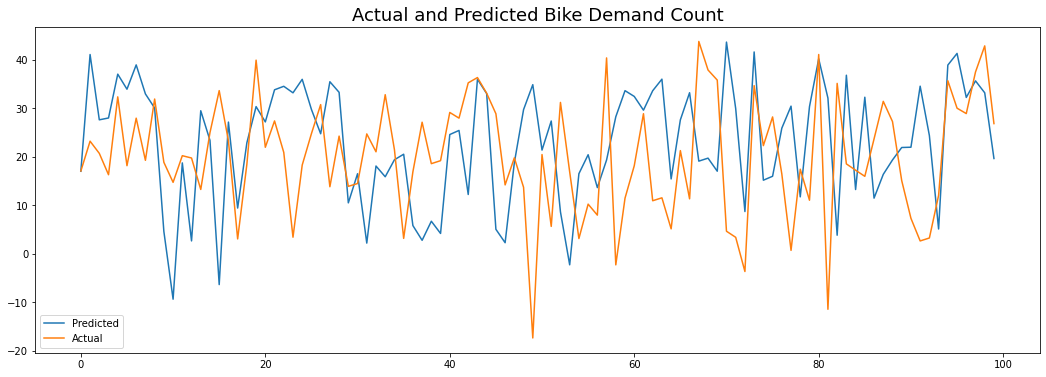

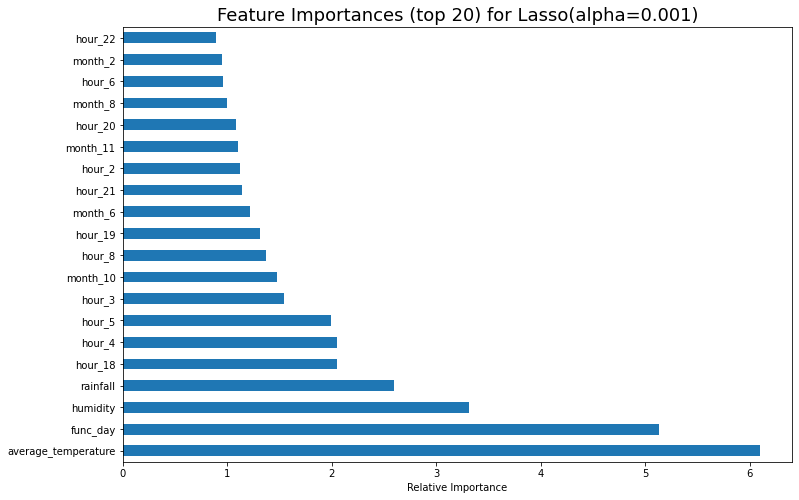

In [105]:
#Evaluation matrices for Lasso regression
lasso_score_tune = reg_model(lasso_reg_tune,x_train, y_train, x_test, y_test)

In [106]:
name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso_score_tune
score

Linear regression  Linear regression Tune  Lasso regression  \
Train_MSE             31.793432               31.793432         55.730054   
Test_MSE              32.075042               32.075042         57.431794   
Train_RMSE             5.638566                5.638566          7.465256   
Test_RMSE              5.663483                5.663483          7.578377   
Train_MAE              4.271704                4.271704          5.951383   
Test_MAE               4.290022                4.290022          6.061377   
Train_R2               0.793995                0.793995          0.638898   
Test_R2                0.796331                0.796331          0.635322   
Train_Adj_R2           0.788313                0.788313          0.628938   
Test_Adj_R2            0.790714                0.790714          0.625263   

              Lasso with alpha = 0.001  
Train_MSE                    31.792389  
Test_MSE                     32.087306  
Train_RMSE                    5.638474  
Test_RMSE                     5.664566  
Train_MAE                     4.270547  
Test_MAE                      4.290071  
Train_R2                      0.794002  
Test_R2                       0.796253  
Train_Adj_R2                  0.788320  
Test_Adj_R2                   0.790634

##### Which hyperparameter optimization technique have you used and why?

Here adopted GridSearchCV to automatically find the best parameters for a machine learning model's controls. This prevents the model from becoming too complex or too simple, and i evaluate its performance using cross-validation. This tool can be a time and effort saver compared to manually adjusting the controls.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Using GridSearchCV, there is a observed enhancement in the model's performance. The train R2 score changed from 0.635322 to 0.796253. But this is not upto the expectation ,As a result, i opted to proceed with the next regression model.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

RMSE and MSE calculate the average squared differences between predicted and actual values. Meanwhile, R2 score gauges how well the model fits the data.
For businesses, low RMSE and high R2 scores show accurate predictions and a good data fit. This helps with useful insights and reliable predictions for future outcomes.

### ML Model - 3 RIDGE Regression

In [107]:
# ML Model - 3 Implementation
ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)
y_pred_ridge1 = ridge_reg.predict(x_test) #prediction for Ridge regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Evaluation metrics for Training data
MSE on training data : 31.792344542919018
RMSE on training data : 5.638470053384962
MAE on training data : 4.270682659438287
R2 score on training data : 0.7940018059878591
Adjusted R2 score on training data : 0.7883199309182753
Evaluation metrics for testing data
MSE on testing data : 32.08759308580361
RMSE on testing data : 5.664591166695405
MAE on testing data : 4.290277791896507
R2 score on testing data : 0.7962514719639874
Adjusted R2 score on testing data : 0.7906316475404589


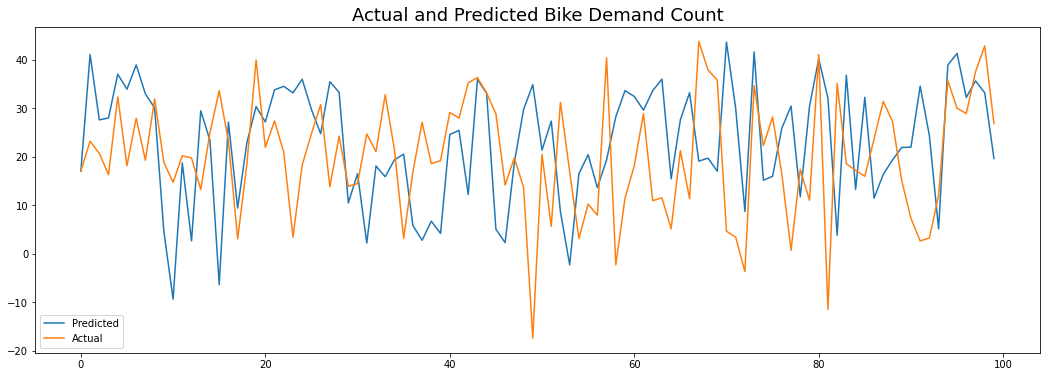

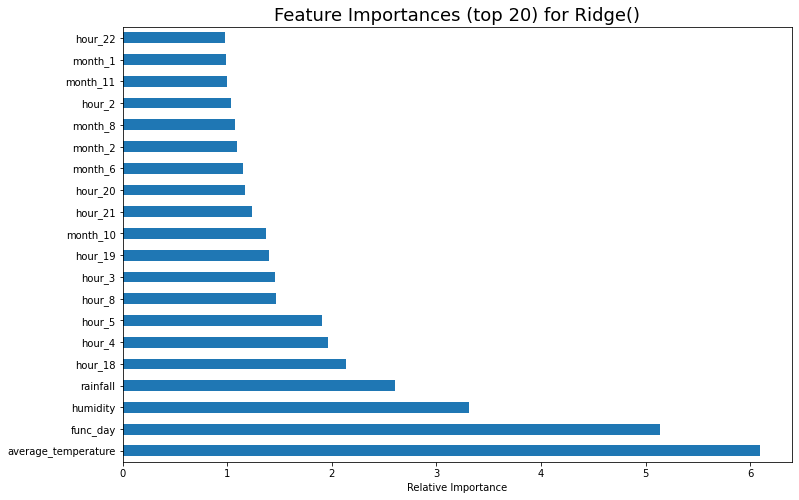

In [108]:
# Visualizing evaluation Metric Score chart
ridge_reg_score = reg_model(ridge_reg, x_train, y_train, x_test, y_test)

In [109]:
score['Ridge Reg'] = ridge_reg_score
score

Linear regression  Linear regression Tune  Lasso regression  \
Train_MSE             31.793432               31.793432         55.730054   
Test_MSE              32.075042               32.075042         57.431794   
Train_RMSE             5.638566                5.638566          7.465256   
Test_RMSE              5.663483                5.663483          7.578377   
Train_MAE              4.271704                4.271704          5.951383   
Test_MAE               4.290022                4.290022          6.061377   
Train_R2               0.793995                0.793995          0.638898   
Test_R2                0.796331                0.796331          0.635322   
Train_Adj_R2           0.788313                0.788313          0.628938   
Test_Adj_R2            0.790714                0.790714          0.625263   

              Lasso with alpha = 0.001  Ridge Reg  
Train_MSE                    31.792389  31.792345  
Test_MSE                     32.087306  32.087593  
Train_RMSE                    5.638474   5.638470  
Test_RMSE                     5.664566   5.664591  
Train_MAE                     4.270547   4.270683  
Test_MAE                      4.290071   4.290278  
Train_R2                      0.794002   0.794002  
Test_R2                       0.796253   0.796251  
Train_Adj_R2                  0.788320   0.788320  
Test_Adj_R2                   0.790634   0.790632

#### 2. Cross- Validation & Hyperparameter Tuning

By observing results of tuned model of Linear reg and lasso reg we can skip the tuning of ridge model as results are not improving. and we can move forword doe tree based algorithams.

### ML Model - 4 Decision Tree Regressor

In [110]:
# ML Model - 3 Implementation
dt_reg = DecisionTreeRegressor(random_state=1)
dt_reg.fit(x_train,y_train)                                          # Fit the Algorithm              
y_pred_dt1 = dt_reg.predict(x_test)                                  # Predict on the model          

Evaluation metrics for Training data
MSE on training data : 3.3769730531721394e-34
RMSE on training data : 1.8376542256834226e-17
MAE on training data : 3.8021336459765633e-19
R2 score on training data : 1.0
Adjusted R2 score on training data : 1.0
Evaluation metrics for testing data
MSE on testing data : 22.61962586992177
RMSE on testing data : 4.756009448047992
MAE on testing data : 2.8595014647782837
R2 score on testing data : 0.8563707952977972
Adjusted R2 score on testing data : 0.8524091916469736


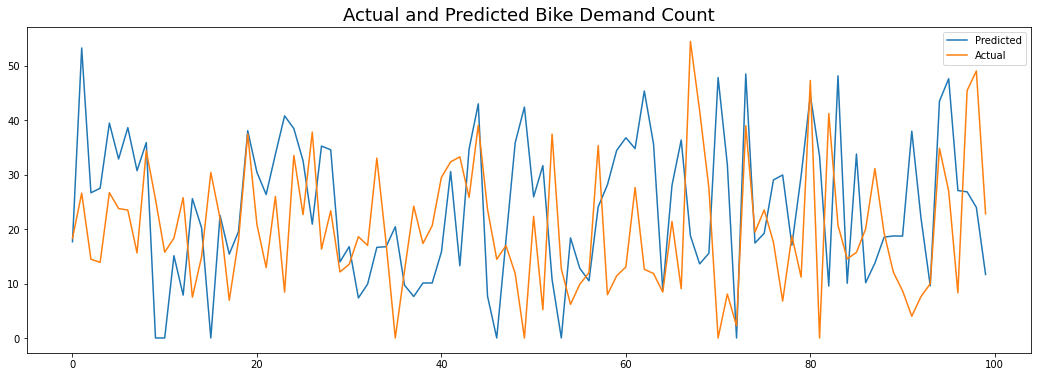

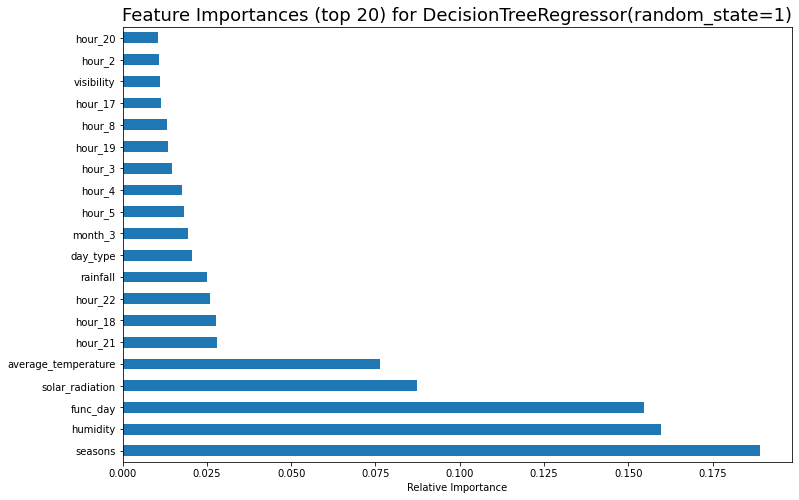

In [111]:
# Evaluation Metric Score chart
dt_reg_score = reg_model(dt_reg,  x_train, y_train, x_test, y_test)

In [112]:
score['Decision tree'] = dt_reg_score
score

Linear regression  Linear regression Tune  Lasso regression  \
Train_MSE             31.793432               31.793432         55.730054   
Test_MSE              32.075042               32.075042         57.431794   
Train_RMSE             5.638566                5.638566          7.465256   
Test_RMSE              5.663483                5.663483          7.578377   
Train_MAE              4.271704                4.271704          5.951383   
Test_MAE               4.290022                4.290022          6.061377   
Train_R2               0.793995                0.793995          0.638898   
Test_R2                0.796331                0.796331          0.635322   
Train_Adj_R2           0.788313                0.788313          0.628938   
Test_Adj_R2            0.790714                0.790714          0.625263   

              Lasso with alpha = 0.001  Ridge Reg  Decision tree  
Train_MSE                    31.792389  31.792345   3.376973e-34  
Test_MSE                     32.087306  32.087593   2.261963e+01  
Train_RMSE                    5.638474   5.638470   1.837654e-17  
Test_RMSE                     5.664566   5.664591   4.756009e+00  
Train_MAE                     4.270547   4.270683   3.802134e-19  
Test_MAE                      4.290071   4.290278   2.859501e+00  
Train_R2                      0.794002   0.794002   1.000000e+00  
Test_R2                       0.796253   0.796251   8.563708e-01  
Train_Adj_R2                  0.788320   0.788320   1.000000e+00  
Test_Adj_R2                   0.790634   0.790632   8.524092e-01

#### 2. Cross- Validation & Hyperparameter Tuning

In [113]:
# Regressor
dt_reg_tune = DecisionTreeRegressor(random_state=1)
grid = {'max_depth' : [8,10,12,14,16],'min_samples_split' : np.arange(35,50),'min_samples_leaf' : np.arange(22,31,2)} # HYperparameter Grid
dt_reg_gridsearch = GridSearchCV(dt_reg_tune,grid,cv=6,scoring= 'neg_root_mean_squared_error')
dt_reg_gridsearch.fit(x_train,y_train)                              # fitting model with hypertuned paramaters using grid search       
dt_best_params = dt_reg_gridsearch.best_params_

In [114]:
# building DT model with best parameters
dt_reg_tune_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 min_samples_split=dt_best_params['min_samples_split'],random_state=1)

In [115]:
# fitting model
dt_reg_tune_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=16, min_samples_leaf=22, min_samples_split=35,
                      random_state=1)

Evaluation metrics for Training data
MSE on training data : 17.168250921972373
RMSE on training data : 4.143458811424626
MAE on training data : 2.8223038607281894
R2 score on training data : 0.888758481479741
Adjusted R2 score on training data : 0.8856902001590531
Evaluation metrics for testing data
MSE on testing data : 24.508360658201784
RMSE on testing data : 4.950591950282489
MAE on testing data : 3.309299280439776
R2 score on testing data : 0.8443777819255129
Adjusted R2 score on testing data : 0.8400853850654773


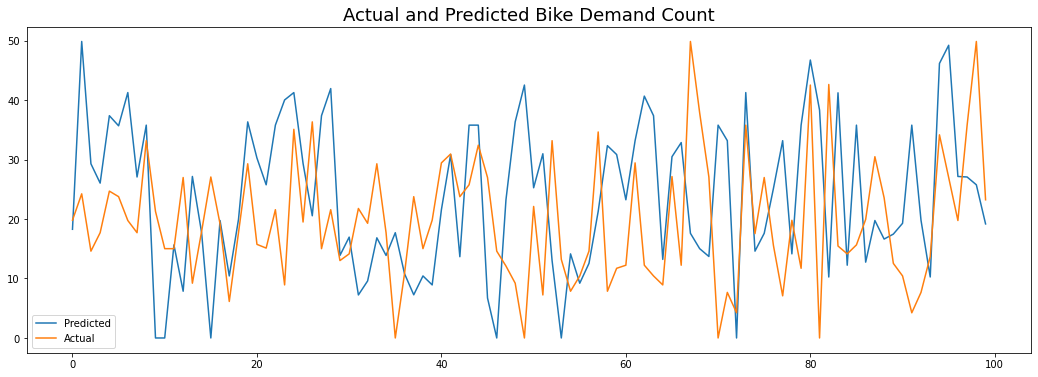

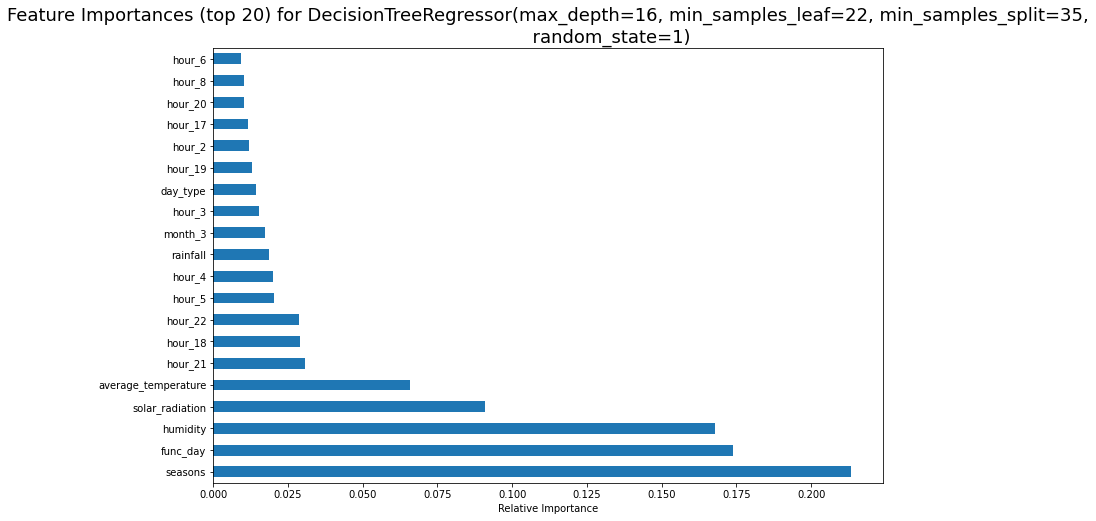

In [116]:
# dt test predictions
y_pred_dt = dt_reg_tune_model.predict(x_test)
dt_reg_tune = reg_model(dt_reg_tune_model, x_train, y_train, x_test, y_test) #Evaluation matrices for DecisionTree

In [117]:
score['Decision tree tuned'] = dt_reg_tune
score

Linear regression  Linear regression Tune  Lasso regression  \
Train_MSE             31.793432               31.793432         55.730054   
Test_MSE              32.075042               32.075042         57.431794   
Train_RMSE             5.638566                5.638566          7.465256   
Test_RMSE              5.663483                5.663483          7.578377   
Train_MAE              4.271704                4.271704          5.951383   
Test_MAE               4.290022                4.290022          6.061377   
Train_R2               0.793995                0.793995          0.638898   
Test_R2                0.796331                0.796331          0.635322   
Train_Adj_R2           0.788313                0.788313          0.628938   
Test_Adj_R2            0.790714                0.790714          0.625263   

              Lasso with alpha = 0.001  Ridge Reg  Decision tree  \
Train_MSE                    31.792389  31.792345   3.376973e-34   
Test_MSE                     32.087306  32.087593   2.261963e+01   
Train_RMSE                    5.638474   5.638470   1.837654e-17   
Test_RMSE                     5.664566   5.664591   4.756009e+00   
Train_MAE                     4.270547   4.270683   3.802134e-19   
Test_MAE                      4.290071   4.290278   2.859501e+00   
Train_R2                      0.794002   0.794002   1.000000e+00   
Test_R2                       0.796253   0.796251   8.563708e-01   
Train_Adj_R2                  0.788320   0.788320   1.000000e+00   
Test_Adj_R2                   0.790634   0.790632   8.524092e-01   

              Decision tree tuned  
Train_MSE               17.168251  
Test_MSE                24.508361  
Train_RMSE               4.143459  
Test_RMSE                4.950592  
Train_MAE                2.822304  
Test_MAE                 3.309299  
Train_R2                 0.888758  
Test_R2                  0.844378  
Train_Adj_R2             0.885690  
Test_Adj_R2              0.840085

##### Which hyperparameter optimization technique have you used and why?

Here adopted GridSearchCV to automatically find the best parameters for a machine learning model's controls. This prevents the model from becoming too complex or too simple, and i evaluate its performance using cross-validation. This tool can be a time and effort saver compared to manually adjusting the controls.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the above tuned Decision tree regression. It Has seen that earlier that we have faced overfitting condition. After tuning it there is no such condition and it looks like model performs with good accuracy around 88% on train and 84% on test data.

### ML Model - 5 Random Forest Regressor

In [118]:
# ML Model - 3 Implementation
rf_reg = RandomForestRegressor(random_state=0)
rf_reg.fit(x_train,y_train)                     # Fit the Algorithm
y_pred_rf = rf_reg.predict(x_test)              # Predict on the model

Evaluation metrics for Training data
MSE on training data : 1.6190626800288408
RMSE on training data : 1.2724239387990313
MAE on training data : 0.7842314635912492
R2 score on training data : 0.989509298767565
Adjusted R2 score on training data : 0.9892199425716
Evaluation metrics for testing data
MSE on testing data : 12.68567567125704
RMSE on testing data : 3.5616956174351904
MAE on testing data : 2.1725834128316555
R2 score on testing data : 0.9194489989246214
Adjusted R2 score on testing data : 0.917227228355054


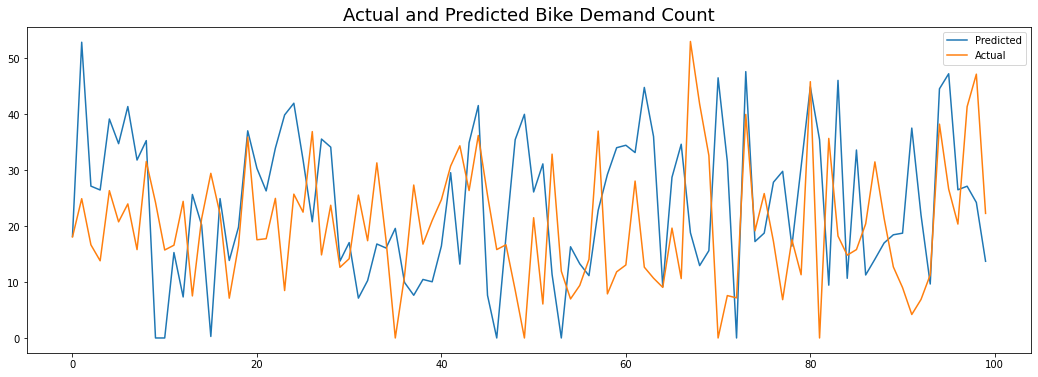

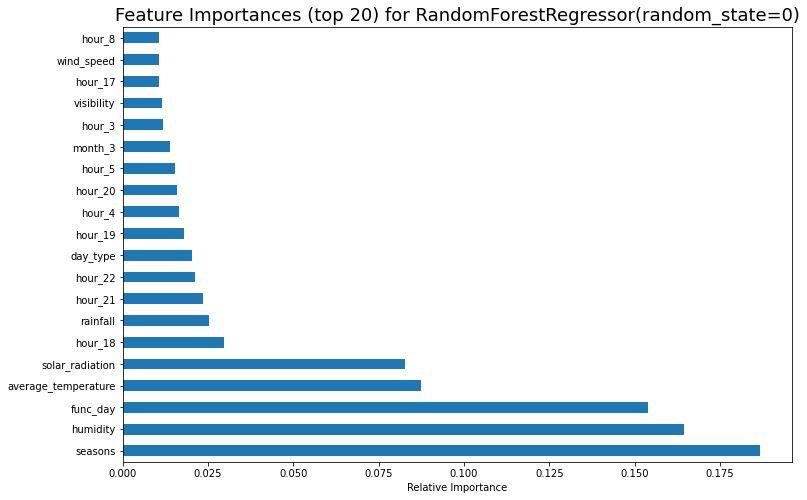

In [119]:
rf_reg_score = reg_model(rf_reg, x_train, y_train, x_test, y_test)

In [120]:
score['Random forest'] = rf_reg_score
score

Linear regression  Linear regression Tune  Lasso regression  \
Train_MSE             31.793432               31.793432         55.730054   
Test_MSE              32.075042               32.075042         57.431794   
Train_RMSE             5.638566                5.638566          7.465256   
Test_RMSE              5.663483                5.663483          7.578377   
Train_MAE              4.271704                4.271704          5.951383   
Test_MAE               4.290022                4.290022          6.061377   
Train_R2               0.793995                0.793995          0.638898   
Test_R2                0.796331                0.796331          0.635322   
Train_Adj_R2           0.788313                0.788313          0.628938   
Test_Adj_R2            0.790714                0.790714          0.625263   

              Lasso with alpha = 0.001  Ridge Reg  Decision tree  \
Train_MSE                    31.792389  31.792345   3.376973e-34   
Test_MSE                     32.087306  32.087593   2.261963e+01   
Train_RMSE                    5.638474   5.638470   1.837654e-17   
Test_RMSE                     5.664566   5.664591   4.756009e+00   
Train_MAE                     4.270547   4.270683   3.802134e-19   
Test_MAE                      4.290071   4.290278   2.859501e+00   
Train_R2                      0.794002   0.794002   1.000000e+00   
Test_R2                       0.796253   0.796251   8.563708e-01   
Train_Adj_R2                  0.788320   0.788320   1.000000e+00   
Test_Adj_R2                   0.790634   0.790632   8.524092e-01   

              Decision tree tuned  Random forest  
Train_MSE               17.168251       1.619063  
Test_MSE                24.508361      12.685676  
Train_RMSE               4.143459       1.272424  
Test_RMSE                4.950592       3.561696  
Train_MAE                2.822304       0.784231  
Test_MAE                 3.309299       2.172583  
Train_R2                 0.888758       0.989509  
Test_R2                  0.844378       0.919449  
Train_Adj_R2             0.885690       0.989220  
Test_Adj_R2              0.840085       0.917227

#### 2. Cross- Validation & Hyperparameter Tuning

In [121]:
# random forest model
rf_tun_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300], 'min_samples_leaf':np.arange(20,25)} # n_estimators limited due to computational power availability
                                                                        # min_samples_leaf Approximate range from a decision tree model

In [122]:
rf_tune_gridsearch = GridSearchCV(rf_tun_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_tune_gridsearch.fit(x_train,y_train)
rf_best_params = rf_tune_gridsearch.best_params_

In [123]:
# Fitting RF model with best parameters
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],min_samples_leaf=rf_best_params['min_samples_leaf'],random_state=0)
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)   # rf predictions on test data

Evaluation metrics for Training data
MSE on training data : 15.437089407053971
RMSE on training data : 3.9290061602209243
MAE on training data : 2.6761964834737757
R2 score on training data : 0.8999755260464004
Adjusted R2 score on training data : 0.8972166350394642
Evaluation metrics for testing data
MSE on testing data : 21.469164889341037
RMSE on testing data : 4.633483019213628
MAE on testing data : 3.039989491621586
R2 score on testing data : 0.8636759468786399
Adjusted R2 score on testing data : 0.8599158350847995


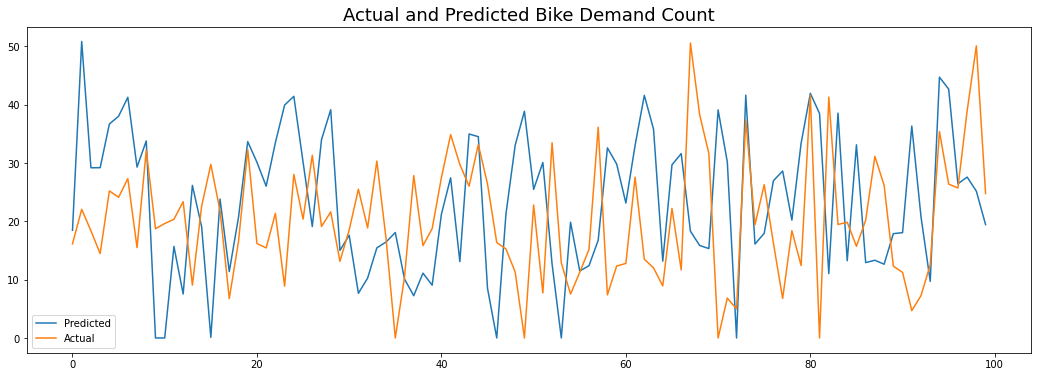

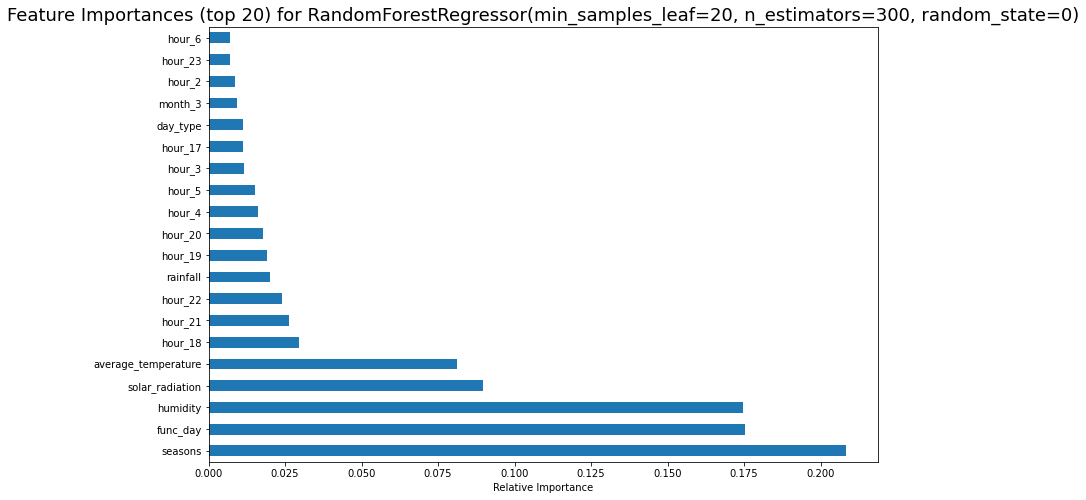

In [124]:
#Evaluation matrices for RandomForest
rf_tune_score = reg_model(rf_model,  x_train, y_train, x_test, y_test)

In [125]:
score['Random forest tuned'] = rf_tune_score
score

Linear regression  Linear regression Tune  Lasso regression  \
Train_MSE             31.793432               31.793432         55.730054   
Test_MSE              32.075042               32.075042         57.431794   
Train_RMSE             5.638566                5.638566          7.465256   
Test_RMSE              5.663483                5.663483          7.578377   
Train_MAE              4.271704                4.271704          5.951383   
Test_MAE               4.290022                4.290022          6.061377   
Train_R2               0.793995                0.793995          0.638898   
Test_R2                0.796331                0.796331          0.635322   
Train_Adj_R2           0.788313                0.788313          0.628938   
Test_Adj_R2            0.790714                0.790714          0.625263   

              Lasso with alpha = 0.001  Ridge Reg  Decision tree  \
Train_MSE                    31.792389  31.792345   3.376973e-34   
Test_MSE                     32.087306  32.087593   2.261963e+01   
Train_RMSE                    5.638474   5.638470   1.837654e-17   
Test_RMSE                     5.664566   5.664591   4.756009e+00   
Train_MAE                     4.270547   4.270683   3.802134e-19   
Test_MAE                      4.290071   4.290278   2.859501e+00   
Train_R2                      0.794002   0.794002   1.000000e+00   
Test_R2                       0.796253   0.796251   8.563708e-01   
Train_Adj_R2                  0.788320   0.788320   1.000000e+00   
Test_Adj_R2                   0.790634   0.790632   8.524092e-01   

              Decision tree tuned  Random forest  Random forest tuned  
Train_MSE               17.168251       1.619063            15.437089  
Test_MSE                24.508361      12.685676            21.469165  
Train_RMSE               4.143459       1.272424             3.929006  
Test_RMSE                4.950592       3.561696             4.633483  
Train_MAE                2.822304       0.784231             2.676196  
Test_MAE                 3.309299       2.172583             3.039989  
Train_R2                 0.888758       0.989509             0.899976  
Test_R2                  0.844378       0.919449             0.863676  
Train_Adj_R2             0.885690       0.989220             0.897217  
Test_Adj_R2              0.840085       0.917227             0.859916

##### Which hyperparameter optimization technique have you used and why?

Here adopted GridSearchCV to automatically find the best parameters for a machine learning model's controls. This prevents the model from becoming too complex or too simple, and i evaluate its performance using cross-validation. This tool can be a time and effort saver compared to manually adjusting the controls.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After tuning the random forest algorithm it has seen that there is drop in performance both in train and test score so we are not going to use this model.

### ML Model - 6 Gradient Boosting Regressor

In [126]:
# ML Model - 3 Implementation
gb_reg = GradientBoostingRegressor(random_state=0)
gb_reg.fit(x_train,y_train)                       # Fit the Algorithm
y_pred_gb = gb_reg.predict(x_test)                # Predict on the model

Evaluation metrics for Training data
MSE on training data : 19.919460426967422
RMSE on training data : 4.463122273360592
MAE on training data : 3.368522706978212
R2 score on training data : 0.8709320456655177
Adjusted R2 score on training data : 0.8673720727466676
Evaluation metrics for testing data
MSE on testing data : 22.54127867127762
RMSE on testing data : 4.747765650416796
MAE on testing data : 3.5722525407132193
R2 score on testing data : 0.8568682812375126
Adjusted R2 score on testing data : 0.852920399323289


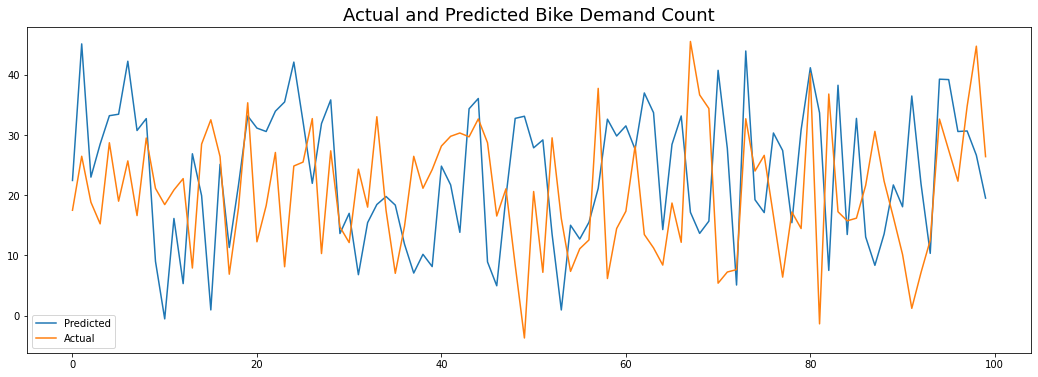

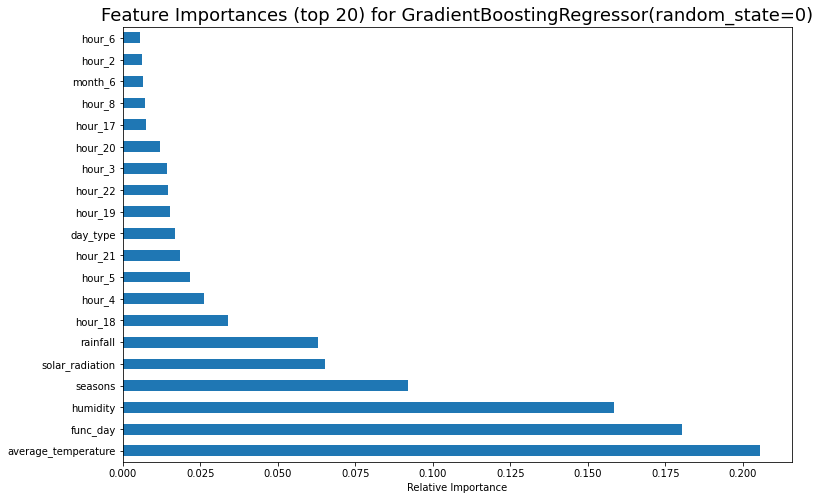

In [127]:
# Evaluation Metric Score chart
gb_reg_score = reg_model(gb_reg, x_train, y_train, x_test, y_test)

In [128]:
score['Gradient Boosting Regressor'] = gb_reg_score
score

Linear regression  Linear regression Tune  Lasso regression  \
Train_MSE             31.793432               31.793432         55.730054   
Test_MSE              32.075042               32.075042         57.431794   
Train_RMSE             5.638566                5.638566          7.465256   
Test_RMSE              5.663483                5.663483          7.578377   
Train_MAE              4.271704                4.271704          5.951383   
Test_MAE               4.290022                4.290022          6.061377   
Train_R2               0.793995                0.793995          0.638898   
Test_R2                0.796331                0.796331          0.635322   
Train_Adj_R2           0.788313                0.788313          0.628938   
Test_Adj_R2            0.790714                0.790714          0.625263   

              Lasso with alpha = 0.001  Ridge Reg  Decision tree  \
Train_MSE                    31.792389  31.792345   3.376973e-34   
Test_MSE                     32.087306  32.087593   2.261963e+01   
Train_RMSE                    5.638474   5.638470   1.837654e-17   
Test_RMSE                     5.664566   5.664591   4.756009e+00   
Train_MAE                     4.270547   4.270683   3.802134e-19   
Test_MAE                      4.290071   4.290278   2.859501e+00   
Train_R2                      0.794002   0.794002   1.000000e+00   
Test_R2                       0.796253   0.796251   8.563708e-01   
Train_Adj_R2                  0.788320   0.788320   1.000000e+00   
Test_Adj_R2                   0.790634   0.790632   8.524092e-01   

              Decision tree tuned  Random forest  Random forest tuned  \
Train_MSE               17.168251       1.619063            15.437089   
Test_MSE                24.508361      12.685676            21.469165   
Train_RMSE               4.143459       1.272424             3.929006   
Test_RMSE                4.950592       3.561696             4.633483   
Train_MAE                2.822304       0.784231             2.676196   
Test_MAE                 3.309299       2.172583             3.039989   
Train_R2                 0.888758       0.989509             0.899976   
Test_R2                  0.844378       0.919449             0.863676   
Train_Adj_R2             0.885690       0.989220             0.897217   
Test_Adj_R2              0.840085       0.917227             0.859916   

              Gradient Boosting Regressor  
Train_MSE                       19.919460  
Test_MSE                        22.541279  
Train_RMSE                       4.463122  
Test_RMSE                        4.747766  
Train_MAE                        3.368523  
Test_MAE                         3.572253  
Train_R2                         0.870932  
Test_R2                          0.856868  
Train_Adj_R2                     0.867372  
Test_Adj_R2                      0.852920

#### 2. Cross- Validation & Hyperparameter Tuning

In [129]:
# GBM model
gb_tune_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[300],'min_samples_leaf':np.arange(20,24),'max_depth':np.arange(14,17)}

In [130]:
# Perform the randomized search
random_search = RandomizedSearchCV(gb_tune_model, param_distributions=gb_params, cv=6, n_iter=20, scoring='neg_root_mean_squared_error', n_jobs=-1)
random_search.fit(x_train, y_train)
gb_best_params = random_search.best_params_

In [131]:
# Building GBM model with best parameters
gb_tune_model = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],min_samples_leaf=gb_best_params['min_samples_leaf'],
                                     max_depth = gb_best_params['max_depth'],random_state=0)
gb_tune_model.fit(x_train,y_train)
y_pred_gb_tune = gb_tune_model.predict(x_test) # gradient boosting test predictions

Evaluation metrics for Training data
MSE on training data : 0.5840323816385254
RMSE on training data : 0.7642201133433518
MAE on training data : 0.5153275637146328
R2 score on training data : 0.9962157677393144
Adjusted R2 score on training data : 0.9961113904410444
Evaluation metrics for testing data
MSE on testing data : 10.029987698816276
RMSE on testing data : 3.167015582345037
MAE on testing data : 2.008820120456223
R2 score on testing data : 0.9363119812574141
Adjusted R2 score on testing data : 0.9345553281582935


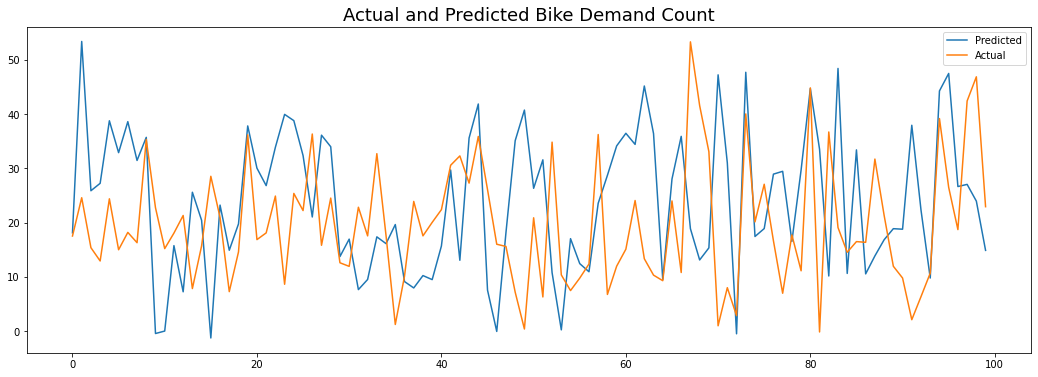

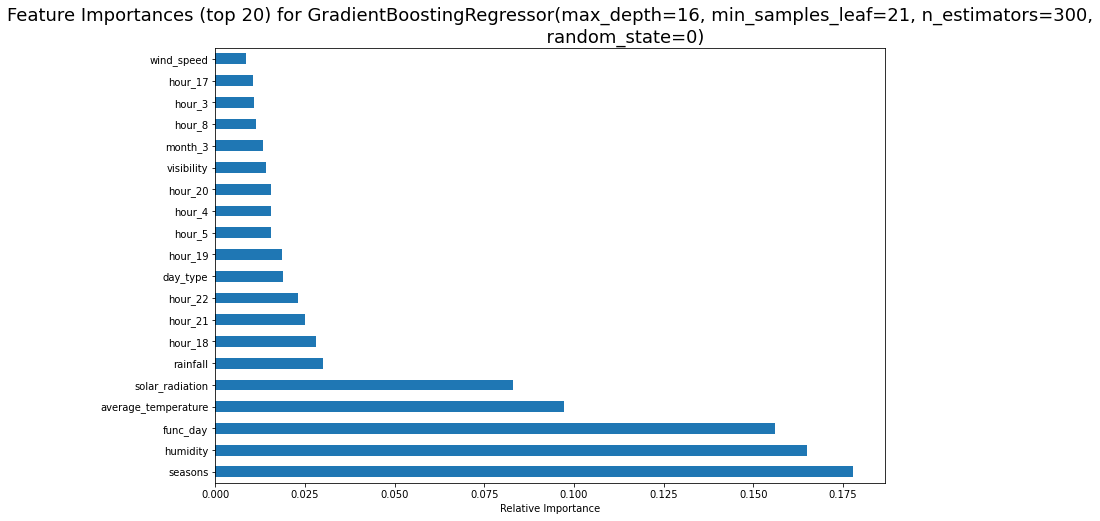

In [132]:
#Evaluation matrices for GradientBoosting
gb_reg_tune_score = reg_model(gb_tune_model, x_train, y_train, x_test, y_test)

In [133]:
score['Gradient Boosting Regressor Tuned'] = gb_reg_tune_score
score

Linear regression  Linear regression Tune  Lasso regression  \
Train_MSE             31.793432               31.793432         55.730054   
Test_MSE              32.075042               32.075042         57.431794   
Train_RMSE             5.638566                5.638566          7.465256   
Test_RMSE              5.663483                5.663483          7.578377   
Train_MAE              4.271704                4.271704          5.951383   
Test_MAE               4.290022                4.290022          6.061377   
Train_R2               0.793995                0.793995          0.638898   
Test_R2                0.796331                0.796331          0.635322   
Train_Adj_R2           0.788313                0.788313          0.628938   
Test_Adj_R2            0.790714                0.790714          0.625263   

              Lasso with alpha = 0.001  Ridge Reg  Decision tree  \
Train_MSE                    31.792389  31.792345   3.376973e-34   
Test_MSE                     32.087306  32.087593   2.261963e+01   
Train_RMSE                    5.638474   5.638470   1.837654e-17   
Test_RMSE                     5.664566   5.664591   4.756009e+00   
Train_MAE                     4.270547   4.270683   3.802134e-19   
Test_MAE                      4.290071   4.290278   2.859501e+00   
Train_R2                      0.794002   0.794002   1.000000e+00   
Test_R2                       0.796253   0.796251   8.563708e-01   
Train_Adj_R2                  0.788320   0.788320   1.000000e+00   
Test_Adj_R2                   0.790634   0.790632   8.524092e-01   

              Decision tree tuned  Random forest  Random forest tuned  \
Train_MSE               17.168251       1.619063            15.437089   
Test_MSE                24.508361      12.685676            21.469165   
Train_RMSE               4.143459       1.272424             3.929006   
Test_RMSE                4.950592       3.561696             4.633483   
Train_MAE                2.822304       0.784231             2.676196   
Test_MAE                 3.309299       2.172583             3.039989   
Train_R2                 0.888758       0.989509             0.899976   
Test_R2                  0.844378       0.919449             0.863676   
Train_Adj_R2             0.885690       0.989220             0.897217   
Test_Adj_R2              0.840085       0.917227             0.859916   

              Gradient Boosting Regressor  Gradient Boosting Regressor Tuned  
Train_MSE                       19.919460                           0.584032  
Test_MSE                        22.541279                          10.029988  
Train_RMSE                       4.463122                           0.764220  
Test_RMSE                        4.747766                           3.167016  
Train_MAE                        3.368523                           0.515328  
Test_MAE                         3.572253                           2.008820  
Train_R2                         0.870932                           0.996216  
Test_R2                          0.856868                           0.936312  
Train_Adj_R2                     0.867372                           0.996111  
Test_Adj_R2                      0.852920                           0.934555

##### Which hyperparameter optimization technique have you used and why?

Here adopted GridSearchCV to automatically find the best parameters for a machine learning model's controls. This prevents the model from becoming too complex or too simple, and i evaluate its performance using cross-validation. This tool can be a time and effort saver compared to manually adjusting the controls.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Using Gradient Boosting Regressor we have got low accuracy around 87% and 85% on train and test data resp. which les than random forest, decision tree algorithm, So tuned GB and performance has significantly improved, achieving an impressive accuracy of 99% on the training data and 93% on the testing data. However, there's a concern of overfitting since the training accuracy is nearly perfect at 100%.

### ML Model - 7 XGB Regressor

In [134]:
# ML Model - 3 Implementation
xgb_reg = xgb.XGBRegressor(random_state=0,objective='reg:squarederror')
xgb_reg.fit(x_train,y_train)                                      # Fit the Algorithm                                                                  # Predict on the model
y_pred_xgb = xgb_reg.predict(x_test)                              # Predict on the model

Evaluation metrics for Training data
MSE on training data : 2.4245135003711984
RMSE on training data : 1.5570849367877138
MAE on training data : 1.0879081761184248
R2 score on training data : 0.984290387839743
Adjusted R2 score on training data : 0.9838570828095011
Evaluation metrics for testing data
MSE on testing data : 11.368260324301973
RMSE on testing data : 3.3716850867632897
MAE on testing data : 2.228830724641322
R2 score on testing data : 0.9278142707303432
Adjusted R2 score on testing data : 0.9258232324230228


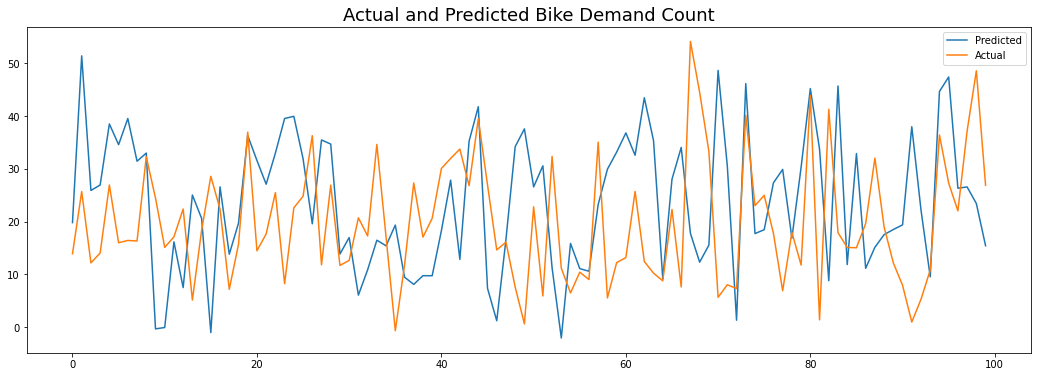

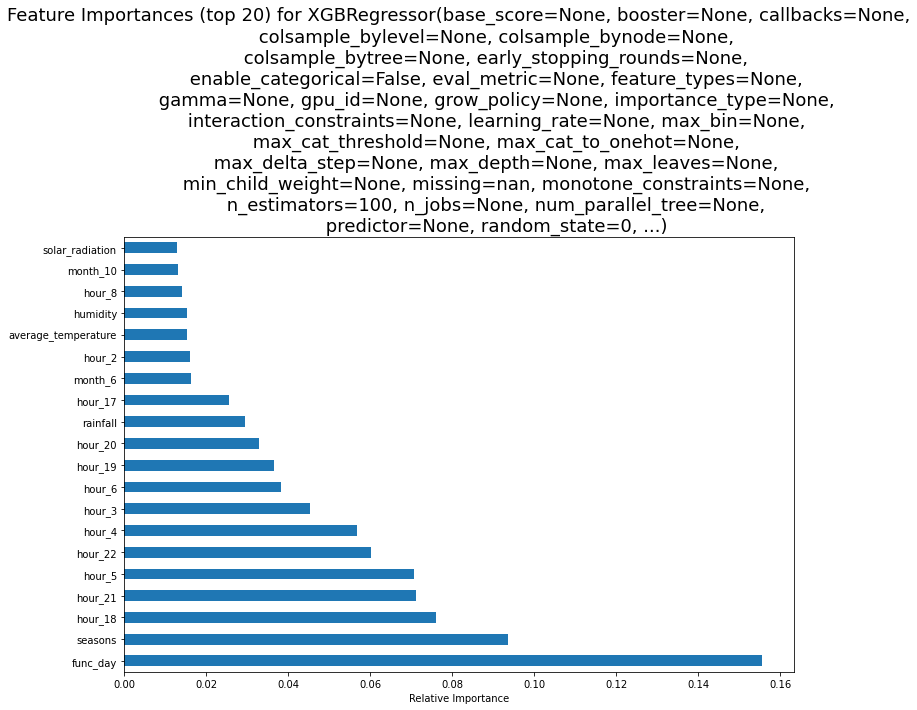

In [135]:
# Evaluation Metric Score chart
xgb_reg_score = reg_model(xgb_reg,  x_train, y_train, x_test, y_test)

In [136]:
score['Xtreme Gradient Boosting Regressor'] = xgb_reg_score
score

Linear regression  Linear regression Tune  Lasso regression  \
Train_MSE             31.793432               31.793432         55.730054   
Test_MSE              32.075042               32.075042         57.431794   
Train_RMSE             5.638566                5.638566          7.465256   
Test_RMSE              5.663483                5.663483          7.578377   
Train_MAE              4.271704                4.271704          5.951383   
Test_MAE               4.290022                4.290022          6.061377   
Train_R2               0.793995                0.793995          0.638898   
Test_R2                0.796331                0.796331          0.635322   
Train_Adj_R2           0.788313                0.788313          0.628938   
Test_Adj_R2            0.790714                0.790714          0.625263   

              Lasso with alpha = 0.001  Ridge Reg  Decision tree  \
Train_MSE                    31.792389  31.792345   3.376973e-34   
Test_MSE                     32.087306  32.087593   2.261963e+01   
Train_RMSE                    5.638474   5.638470   1.837654e-17   
Test_RMSE                     5.664566   5.664591   4.756009e+00   
Train_MAE                     4.270547   4.270683   3.802134e-19   
Test_MAE                      4.290071   4.290278   2.859501e+00   
Train_R2                      0.794002   0.794002   1.000000e+00   
Test_R2                       0.796253   0.796251   8.563708e-01   
Train_Adj_R2                  0.788320   0.788320   1.000000e+00   
Test_Adj_R2                   0.790634   0.790632   8.524092e-01   

              Decision tree tuned  Random forest  Random forest tuned  \
Train_MSE               17.168251       1.619063            15.437089   
Test_MSE                24.508361      12.685676            21.469165   
Train_RMSE               4.143459       1.272424             3.929006   
Test_RMSE                4.950592       3.561696             4.633483   
Train_MAE                2.822304       0.784231             2.676196   
Test_MAE                 3.309299       2.172583             3.039989   
Train_R2                 0.888758       0.989509             0.899976   
Test_R2                  0.844378       0.919449             0.863676   
Train_Adj_R2             0.885690       0.989220             0.897217   
Test_Adj_R2              0.840085       0.917227             0.859916   

              Gradient Boosting Regressor  Gradient Boosting Regressor Tuned  \
Train_MSE                       19.919460                           0.584032   
Test_MSE                        22.541279                          10.029988   
Train_RMSE                       4.463122                           0.764220   
Test_RMSE                        4.747766                           3.167016   
Train_MAE                        3.368523                           0.515328   
Test_MAE                         3.572253                           2.008820   
Train_R2                         0.870932                           0.996216   
Test_R2                          0.856868                           0.936312   
Train_Adj_R2                     0.867372                           0.996111   
Test_Adj_R2                      0.852920                           0.934555   

              Xtreme Gradient Boosting Regressor  
Train_MSE                               2.424514  
Test_MSE                               11.368260  
Train_RMSE                              1.557085  
Test_RMSE                               3.371685  
Train_MAE                               1.087908  
Test_MAE                                2.228831  
Train_R2                                0.984290  
Test_R2                                 0.927814  
Train_Adj_R2                            0.983857  
Test_Adj_R2                             0.925823

#### 2. Cross- Validation & Hyperparameter Tuning

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [137]:
# xg boost
xgb_reg_tune = xgb.XGBRegressor(random_state=0,objective='reg:squarederror')
xgb_params = {'n_estimators':[500],'min_samples_leaf':np.arange(20,22)}

In [139]:
# finding best parameters
xgb_reg_tune_search = RandomizedSearchCV(xgb_reg_tune,xgb_params,cv=6,scoring='neg_root_mean_squared_error',n_iter=100, n_jobs=-1)
xgb_reg_tune_search.fit(x_train,y_train)
xgb__reg_best_params = xgb_reg_tune_search.best_params_

[17:49:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.



In [140]:
# Building a XG boost model with best parameters
xgb_reg_tune = xgb.XGBRegressor(n_estimators=xgb__reg_best_params['n_estimators'],min_samples_leaf=xgb__reg_best_params['min_samples_leaf'],random_state=0)
xgb_reg_tune.fit(x_train,y_train)
y_pred_xgb = xgb_reg_tune.predict(x_test)                # xtreme gradient boosting test predictions

[17:49:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.



[17:49:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.



Evaluation metrics for Training data
MSE on training data : 0.09928179286831203
RMSE on training data : 0.3150901345144148
MAE on training data : 0.21859712994615932
R2 score on training data : 0.9993567045676185
Adjusted R2 score on training data : 0.9993389610903168
Evaluation metrics for testing data
MSE on testing data : 11.008978775287405
RMSE on testing data : 3.3179781155528145
MAE on testing data : 2.20124220438237
R2 score on testing data : 0.930095622484165
Adjusted R2 score on testing data : 0.928167508785078


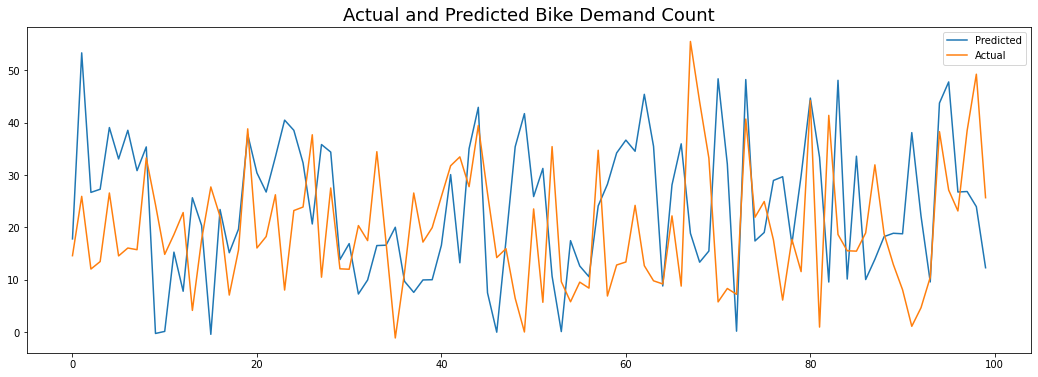

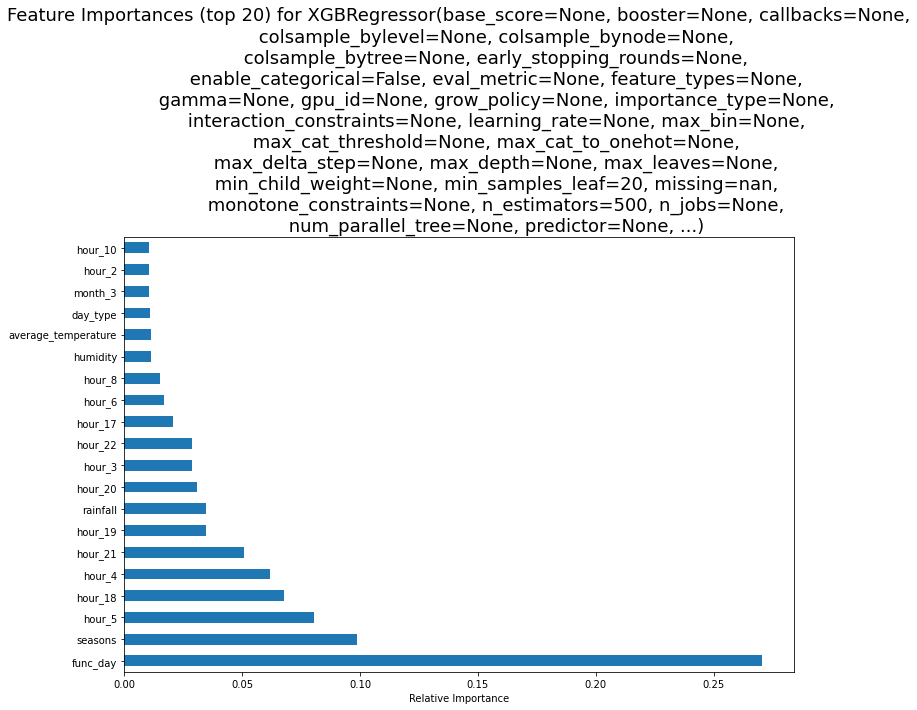

In [141]:
#Evaluation matrices for XGBRegressor
xgb_reg_tune_score = reg_model(xgb_reg_tune, x_train, y_train, x_test, y_test)

In [142]:
score['Xtreme Gradient Boosting Regressor Tuned'] = xgb_reg_tune_score
score

Linear regression  Linear regression Tune  Lasso regression  \
Train_MSE             31.793432               31.793432         55.730054   
Test_MSE              32.075042               32.075042         57.431794   
Train_RMSE             5.638566                5.638566          7.465256   
Test_RMSE              5.663483                5.663483          7.578377   
Train_MAE              4.271704                4.271704          5.951383   
Test_MAE               4.290022                4.290022          6.061377   
Train_R2               0.793995                0.793995          0.638898   
Test_R2                0.796331                0.796331          0.635322   
Train_Adj_R2           0.788313                0.788313          0.628938   
Test_Adj_R2            0.790714                0.790714          0.625263   

              Lasso with alpha = 0.001  Ridge Reg  Decision tree  \
Train_MSE                    31.792389  31.792345   3.376973e-34   
Test_MSE                     32.087306  32.087593   2.261963e+01   
Train_RMSE                    5.638474   5.638470   1.837654e-17   
Test_RMSE                     5.664566   5.664591   4.756009e+00   
Train_MAE                     4.270547   4.270683   3.802134e-19   
Test_MAE                      4.290071   4.290278   2.859501e+00   
Train_R2                      0.794002   0.794002   1.000000e+00   
Test_R2                       0.796253   0.796251   8.563708e-01   
Train_Adj_R2                  0.788320   0.788320   1.000000e+00   
Test_Adj_R2                   0.790634   0.790632   8.524092e-01   

              Decision tree tuned  Random forest  Random forest tuned  \
Train_MSE               17.168251       1.619063            15.437089   
Test_MSE                24.508361      12.685676            21.469165   
Train_RMSE               4.143459       1.272424             3.929006   
Test_RMSE                4.950592       3.561696             4.633483   
Train_MAE                2.822304       0.784231             2.676196   
Test_MAE                 3.309299       2.172583             3.039989   
Train_R2                 0.888758       0.989509             0.899976   
Test_R2                  0.844378       0.919449             0.863676   
Train_Adj_R2             0.885690       0.989220             0.897217   
Test_Adj_R2              0.840085       0.917227             0.859916   

              Gradient Boosting Regressor  Gradient Boosting Regressor Tuned  \
Train_MSE                       19.919460                           0.584032   
Test_MSE                        22.541279                          10.029988   
Train_RMSE                       4.463122                           0.764220   
Test_RMSE                        4.747766                           3.167016   
Train_MAE                        3.368523                           0.515328   
Test_MAE                         3.572253                           2.008820   
Train_R2                         0.870932                           0.996216   
Test_R2                          0.856868                           0.936312   
Train_Adj_R2                     0.867372                           0.996111   
Test_Adj_R2                      0.852920                           0.934555   

              Xtreme Gradient Boosting Regressor  \
Train_MSE                               2.424514   
Test_MSE                               11.368260   
Train_RMSE                              1.557085   
Test_RMSE                               3.371685   
Train_MAE                               1.087908   
Test_MAE                                2.228831   
Train_R2                                0.984290   
Test_R2                                 0.927814   
Train_Adj_R2                            0.983857   
Test_Adj_R2                             0.925823   

              Xtreme Gradient Boosting Regressor Tuned  
Train_MSE                                     0.099282  
Test_MSE                                     

##### Which hyperparameter optimization technique have you used and why?

Randomized Search: Efficient hyperparameter tuning by randomly sampling values for model optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Using Xtream Gradient Boosting Regressor we have got low accuracy around 99% and 93% on train and test data resp.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Based on models analysis, i've chosen the R2 score as the evaluation metric. It effectively gauges model accuracy and serves as a strong indicator of model feasibility.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We experimented with various models including linear regression, decision tree, random forest, gradient boosting, and XGBoost. Among these, we opted for the XGBoost regressor due to its promising performance, and not tuned one as tuned xgb with 99% training accuracy and 93% testing accuracy so it might be overfitted so i finalised the XGBoost, with 98% as training and 92% as testing accuracy.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

### SHAP(Shapley additive Explanations)

In [143]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [144]:
# importing shap
import shap

In [147]:
#Shap explainer for xgb (tree based)
explainer = shap.TreeExplainer(xgb_reg, x_train, feature_names=scale_features)

In [148]:
shap.initjs()
instance = x_test[50, :]                                           # select an instance from the test set
shap_values = explainer(instance)                                  # compute the SHAP values for the instance
shap.plots.force(shap_values)                                      # create the SHAP force plot

The force plot illustrates the SHAP values for a specific data instance.

In this case, we've chosen the data values corresponding to the 50th index for the plot. It displays the varied contributions of different columns in generating the prediction of 22.80 (square root value).

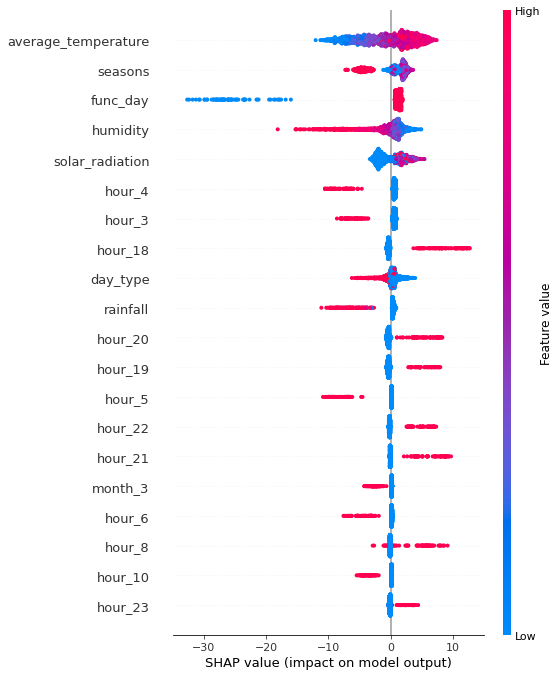

In [149]:
# get shap values of test data
shap_values = explainer(x_test)
shap.summary_plot(shap_values, x_test)

The summary plot presents the highest 20 columns and their influence on predictions. Red signifies high column values, while blue indicates low values.

Categorical columns use zeros (blue) and ones (red). Shap values are depicted, displaying their effect on predictions. Rightward indicates positive impact (increased prediction), while leftward implies negative impact (decreased prediction).

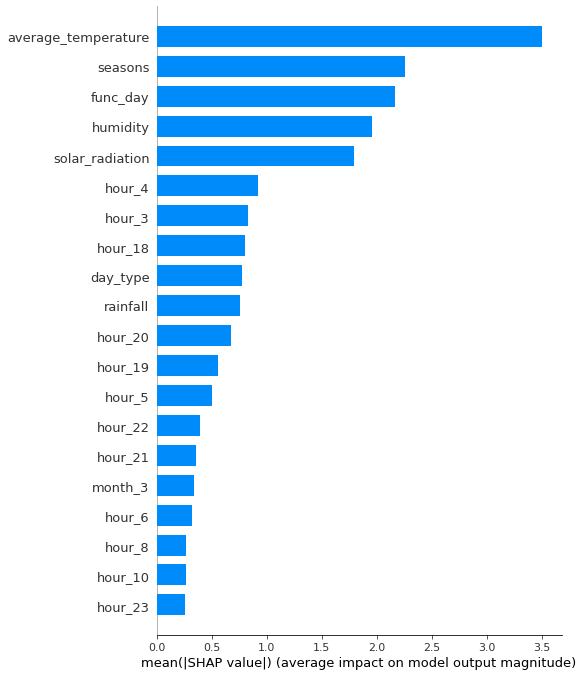

In [150]:
# Obtain a Bar Summary Plot
shap.summary_plot(shap_values, x_test, plot_type="bar")

The bar plot illustrates the most significant 20 features and their average SHAP values, indicating their collective effect on the model's output magnitude.

However, it doesn't differentiate between positive and negative impacts on the prediction.

In [153]:
pip install eli5

     ------------------------------------ 216.2/216.2 KB 658.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=c9f91ea1d2af120cfb4ca51700281b957dbe83291c8599ae330dd7f7a8e68ad9
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\b8\58\ef\2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


You should consider upgrading via the 'c:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [154]:
#import eli5
import eli5

In [156]:
# explain the predictions of the regressor
explainer = eli5.explain_prediction_xgboost(xgb_reg, x_test[50, :], feature_names=scale_features)
print(explainer)

Explanation(estimator='XGBRegressor(base_score=None, booster=None, callbacks=None,\n             colsample_bylevel=None, colsample_bynode=None,\n             colsample_bytree=None, early_stopping_rounds=None,\n             enable_categorical=False, eval_metric=None, feature_types=None,\n             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n             interaction_constraints=None, learning_rate=None, max_bin=None,\n             max_cat_threshold=None, max_cat_to_onehot=None,\n             max_delta_step=None, max_depth=None, max_leaves=None,\n             min_child_weight=None, missing=nan, monotone_constraints=None,\n             n_estimators=100, n_jobs=None, num_parallel_tree=None,\n             predictor=None, random_state=0, ...)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes

In [158]:
print('''Explanation(estimator='XGBRegressor(base_score=None, booster=None, callbacks=None,\n             colsample_bylevel=None, colsample_bynode=None,\n             colsample_bytree=None, early_stopping_rounds=None,\n             enable_categorical=False, eval_metric=None, feature_types=None,\n             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n             interaction_constraints=None, learning_rate=None, max_bin=None,\n             max_cat_threshold=None, max_cat_to_onehot=None,\n             max_delta_step=None, max_depth=None, max_leaves=None,\n             min_child_weight=None, missing=nan, monotone_constraints=None,\n             n_estimators=100, n_jobs=None, num_parallel_tree=None,\n             predictor=None, random_state=0, ...)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=23.05028414228031, std=None, value=1.0), FeatureWeight(feature='seasons', weight=4.042983547827598, std=None, value=0.45630743350687947), FeatureWeight(feature='day_type', weight=0.9398921875474443, std=None, value=1.5841765635860745), FeatureWeight(feature='hour_0', weight=0.9266245962450572, std=None, value=4.79583152331272), FeatureWeight(feature='func_day', weight=0.7058801199521272, std=None, value=0.18667988589875736), FeatureWeight(feature='hour_4', weight=0.48206192105332035, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_5', weight=0.4389086092506426, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_2', weight=0.22659535228417144, std=None, value=-0.20851441405707474), FeatureWeight(feature='rainfall', weight=0.20072244725473154, std=None, value=-0.18971985616543408), FeatureWeight(feature='hour_3', weight=0.18855990773661402, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_10', weight=0.18477457656197654, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_6', weight=0.17155462754159753, std=None, value=-0.20851441405707474), FeatureWeight(feature='month_3', weight=0.125831565981327, std=None, value=-0.30465451130335336), FeatureWeight(feature='hour_11', weight=0.09761077929242296, std=None, value=-0.20851441405707474), FeatureWeight(feature='month_8', weight=0.07965550325291802, std=None, value=-0.30465451130335336), FeatureWeight(feature='holiday', weight=0.07555449223027069, std=None, value=-0.227756885400337), FeatureWeight(feature='month_4', weight=0.0684328996511645, std=None, value=-0.29925280083228983), FeatureWeight(feature='hour_1', weight=0.05503794438305169, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_12', weight=0.04869540186886189, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_13', weight=0.030241037719352097, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_9', weight=0.02921005461596733, std=None, value=-0.20851441405707474), FeatureWeight(feature='snowfall', weight=0.029154643476752156, std=None, value=-0.19183522544836099), FeatureWeight(feature='hour_15', weight=0.01795327403061229, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_14', weight=0.015555107347811592, std=None, value=-0.20851441405707474), FeatureWeight(feature='month_1', weight=0.009757474412818577, std=None, value=-0.30465451130335336), FeatureWeight(feature='wind_speed', weight=0.007676455646161389, std=None, value=0.3725877419869559), FeatureWeight(feature='month_9', weight=0.007273148958710994, std=None, value=-0.29925280083228983)], neg=[FeatureWeight(feature='average_temperature', weight=-3.2690137251073508, std=None, value=-0.5094006556456484), FeatureWeight(feature='solar_radiation', weight=-2.862500544656415, std=None, value=-0.6564755410310821), FeatureWeight(feature='hour_21', weight=-0.6620509737694672, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_22', weight=-0.6441688912894702, std=None, value=-0.20851441405707474), FeatureWeight(feature='humidity', weight=-0.5321484134992053, std=None, value=0.8729200512228672), FeatureWeight(feature='hour_8', weight=-0.39559324794791695, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_20', weight=-0.28448940808807555, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_19', weight=-0.2646719619199786, std=None, value=-0.20851441405707474), FeatureWeight(feature='hour_18', weight=-0.19192444273574488, std=None, value=-0.20851441405707474), FeatureWeight(feature='month_10', weight=-0.16032507628350795, std=None, value=-0.30465451130335336), FeatureWeight(feature='hour_17', weight=-0.13676490820033887, std=None, value=-0.20851441405707474), FeatureWeight(feature='month_6', weight=-0.13259863247022813, std=None, value=-0.29925280083228983), FeatureWeight(feature='hour_23', weight=-0.10258102513315502, std=None, value=-0.20851441405707474), FeatureWeight(feature='month_5', weight=-0.08176123416949833, std=None, value=-0.30465451130335336), FeatureWeight(feature='visibility', weight=-0.065576486134217, std=None, value=-0.9318746592095245), FeatureWeight(feature='hour_16', weight=-0.058081412042320535, std=None, value=-0.20851441405707474), FeatureWeight(feature='month_12', weight=-0.04566186757637381, std=None, value=-0.30465451130335336), FeatureWeight(feature='month_11', weight=-0.022582658721491587, std=None, value=3.3416562759605704), FeatureWeight(feature='hour_7', weight=-0.01638330331931983, std=None, value=-0.20851441405707474), FeatureWeight(feature='month_2', weight=-0.013283321353380282, std=None, value=-0.2882465150048877), FeatureWeight(feature='month_7', weight=-0.011788365850548772, std=None, value=-0.30465451130335336)], pos_remaining=0, neg_remaining=0), proba=None, score=22.302531918135795, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None''')

Explanation(estimator='XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)', description='
Features with largest coefficients.

Feature weights are calculated by following decision paths in trees
of an ensemble. Each leaf has an output score, and expected scores can also be
assigned to parent nodes. Contribution 

In [159]:
eli5.show_prediction(xgb_reg, x_test[50, :], show_feature_values=True, feature_names=scale_features)

We observe how various columns affect the model's prediction.

The table presents both the contribution and the corresponding values.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [169]:
# Import pickle
import pickle
pickle.dump(xgb_reg, open('xgbmodel.pkl', 'wb'))      # Save the best model (XGB)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [173]:
pickled_model = pickle.load(open('xgbmodel.pkl', 'rb'))             # Load the File and predict unseen data.
predict_new = np.array(instance).reshape(1,-1)                      # create a list for the x test value for the 50 index row
pickled_model.predict(predict_new)                                  # Testing on one instance which we used for shap x_test[50,:].reshape(1,-1)                                     

array([22.80253], dtype=float32)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The project effectively showcased the applicability of machine learning for predicting bike demand in Seoul.

Key observations include:

- Peaks in demand during mornings and evenings.
- Reduced demand during winter.
- Highest demand experienced in June.
- Identified multicollinearity between temperature and dew point temperature.
- Explored and tested various regression models, achieving the highest accuracy of 98% on training and 92% on testing with Xtreme Gradient Boosting.

Overall, this project underscores the potential of machine learning for real-world problem-solving and paves the way for further exploration in the field. The findings can be extended to similar bike-sharing systems in other cities, leading to enhanced operational efficiency and improved outcomes for stakeholders.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***